In [ ]:
import pandas as pd
import numpy as np
df_meo1 = pd.read_csv("/content/DATA_MEO_Train.csv",parse_dates=['utc_time'])
df_meo1 = df_meo1.rename(columns={
    "x_error (m)" : "x_error",
    "y_error  (m)" : "y_error",
    "z_error (m)" : "z_error",
    "satclockerror (m)" : "satclockerror"
})
df_meo1['residual'] = np.sqrt(df_meo1['x_error']**2 + df_meo1['y_error']**2 + df_meo1['z_error']**2)
df_meo1.to_csv("MEO_with_residuals.csv", index=False)
df_meo2 = pd.read_csv("/content/DATA_MEO_Train2.csv",parse_dates=['utc_time'])
df_meo2 = df_meo2.rename(columns={
    "x_error (m)" : "x_error",
    "y_error (m)" : "y_error",
    "z_error (m)" : "z_error",
    "satclockerror (m)" : "satclockerror"
})
df_meo2['residual'] = np.sqrt(df_meo2['x_error']**2 + df_meo2['y_error']**2 + df_meo2['z_error']**2)
df_meo2.to_csv("MEO2_with_residuals.csv", index=False)
print(df_meo2.head(5))
print(df_meo1.head(5))

             utc_time   x_error   y_error   z_error  satclockerror  residual
0 2025-09-03 10:11:00 -0.026800  0.073632  0.078433       0.008539  0.110867
1 2025-09-03 10:21:00 -0.085093  0.038818  0.082896      -0.006356  0.124978
2 2025-09-03 10:31:00 -0.098012  0.039264  0.114348       0.011094  0.155639
3 2025-09-03 10:41:00 -0.107813  0.054688  0.132517      -0.006356  0.179375
4 2025-09-03 10:51:00 -0.062513  0.020461  0.072511      -0.006356  0.097900
             utc_time   x_error   y_error   z_error  satclockerror  residual
0 2025-09-01 14:00:00 -0.765883  0.671544  0.434251      -0.183989  1.107304
1 2025-09-01 15:00:00 -0.568186  0.392191  0.637844      -0.159422  0.939943
2 2025-09-01 16:00:00 -0.535862  0.174319  0.723323       0.035761  0.916914
3 2025-09-01 17:00:00 -0.641200 -0.205229  0.718195      -0.077574  0.984409
4 2025-09-01 18:00:00 -0.638888 -0.396329  0.475825       0.161143  0.889755


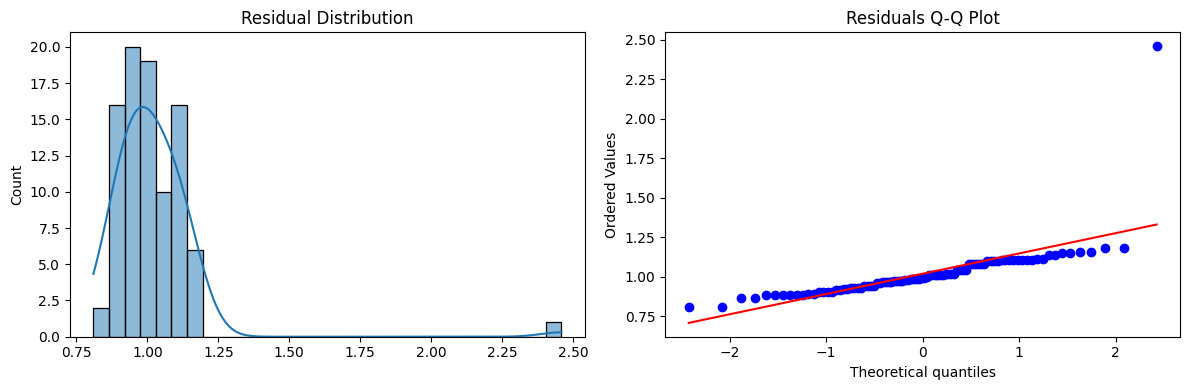

Kolmogorov-Smirnov Test p-value: 0.0000
Shapiro-Wilk Test p-value: 0.0000


In [ ]:
# Gaussianity of residuals of meo1
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

residuals = df_meo1['residual'].dropna().values # remove the NaN values and converting the pandas series into numpy array
plt.figure(figsize=(12,4)) # create a figure with 2 subplots
plt.subplot(1,2,1) # left subplot
sns.histplot(residuals, kde=True, bins=30) # plots a smooth kernel density estimate curve to visualize the approximate distribution shape (bins -> divide the data range into 30 bars)
plt.title('Residual Distribution')
plt.subplot(1,2,2) # right subplot
stats.probplot(residuals, dist='norm', plot=plt) # comparing the residual data to a theoritical normal (Gaussian) distribution with Q-Q plot
plt.title('Residuals Q-Q Plot')
plt.tight_layout() # prevents titles and axes labels from overlappingg and automatically adjusts subplot parameters to give specified padding
plt.show()
# Interpretation : If residuals are normally distributed the points should lie approximately on the reference straight line

shapiro_wilk_p = stats.shapiro(residuals).pvalue # performs the Shapiro-Wilk test for normality and extracts the p value alone
# Interpretation : If the p-value < alpha (commonly 0.05) not normally distributed
#                : If the p-value >= alpha (commonly 0.05) data is normally distributed
kolmogorov_smirnov_p = stats.kstest(residuals, 'norm').pvalue # performs the one-sample Kolmogorov-Smirnov test (with standard mean = 0 and deviation = 1 by default) and extracts the p value alone
# Interpretation : If the p-value < alpha (commonly 0.05) not normally distributed
#                : If the p-value >= alpha (commonly 0.05) data is normally distributed
print(f'Kolmogorov-Smirnov Test p-value: {kolmogorov_smirnov_p:.4f}')
print(f'Shapiro-Wilk Test p-value: {shapiro_wilk_p:.4f}')

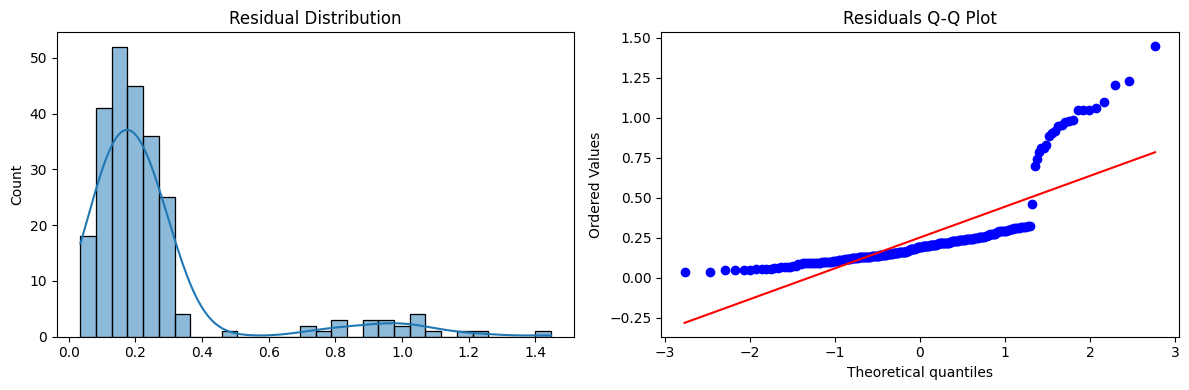

Kolmogorov-Smirnov Test p-value: 0.0000
Shapiro-Wilk Test p-value: 0.0000


In [ ]:
# Gaussianity of residuals of meo1
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

residuals = df_meo2['residual'].dropna().values # remove the NaN values and converting the pandas series into numpy array
plt.figure(figsize=(12,4)) # create a figure with 2 subplots
plt.subplot(1,2,1) # left subplot
sns.histplot(residuals, kde=True, bins=30) # plots a smooth kernel density estimate curve to visualize the approximate distribution shape (bins -> divide the data range into 30 bars)
plt.title('Residual Distribution')
plt.subplot(1,2,2) # right subplot
stats.probplot(residuals, dist='norm', plot=plt) # comparing the residual data to a theoritical normal (Gaussian) distribution with Q-Q plot
plt.title('Residuals Q-Q Plot')
plt.tight_layout() # prevents titles and axes labels from overlappingg and automatically adjusts subplot parameters to give specified padding
plt.show()
# Interpretation : If residuals are normally distributed the points should lie approximately on the reference straight line

shapiro_wilk_p = stats.shapiro(residuals).pvalue # performs the Shapiro-Wilk test for normality and extracts the p value alone
# Interpretation : If the p-value < alpha (commonly 0.05) not normally distributed
#                : If the p-value >= alpha (commonly 0.05) data is normally distributed
kolmogorov_smirnov_p = stats.kstest(residuals, 'norm').pvalue # performs the one-sample Kolmogorov-Smirnov test (with standard mean = 0 and deviation = 1 by default) and extracts the p value alone
# Interpretation : If the p-value < alpha (commonly 0.05) not normally distributed
#                : If the p-value >= alpha (commonly 0.05) data is normally distributed
print(f'Kolmogorov-Smirnov Test p-value: {kolmogorov_smirnov_p:.4f}')
print(f'Shapiro-Wilk Test p-value: {shapiro_wilk_p:.4f}')

In [ ]:
df_meo1['utc_time'] = pd.to_datetime(df_meo1['utc_time']) # convert the string to date time value
df_meo1 = df_meo1.sort_values(by="utc_time") # sort the rows with respect to utc time
df_meo1['dt'] = df_meo1["utc_time"].diff().dt.total_seconds() # the diff in time duration btw timestamps
print(df_meo1.head(5))
df_meo1.describe() # describe the dataset

              utc_time   x_error   y_error   z_error  satclockerror  residual  \
0  2025-09-01 14:00:00 -0.765883  0.671544  0.434251      -0.183989  1.107304   
46 2025-09-01 14:00:00 -0.765883  0.671544  0.434251      -0.183989  1.107304   
1  2025-09-01 15:00:00 -0.568186  0.392191  0.637844      -0.159422  0.939943   
47 2025-09-01 15:00:00 -0.568186  0.392191  0.637844      -0.159422  0.939943   
2  2025-09-01 16:00:00 -0.535862  0.174319  0.723323       0.035761  0.916914   

        dt  
0      NaN  
46     0.0  
1   3600.0  
47     0.0  
2   3600.0  


,utc_time,x_error,y_error,z_error,satclockerror,residual,dt
count,90,90.000000,90.000000,90.000000,90.000000,90.000000,89.000000
mean,2025-09-04 15:53:51.333333504,-0.580299,0.212977,0.023129,0.039639,1.019828,5905.617978
min,2025-09-01 14:00:00,-2.270492,-0.812115,-0.867343,-0.730753,0.809657,0.000000
25%,2025-09-02 21:00:00,-0.764510,-0.150728,-0.660408,-0.101061,0.932007,0.000000
50%,2025-09-04 23:00:00,-0.624094,0.272609,0.168364,0.019282,0.993037,780.000000
75%,2025-09-06 06:00:00,-0.425624,0.631360,0.595942,0.138628,1.093872,3600.000000
max,2025-09-07 16:00:00,0.054012,0.943559,0.799759,1.576007,2.459053,75600.000000
std,NaN,0.322935,0.460059,0.616858,0.351754,0.177934,16431.474783


<Axes: >

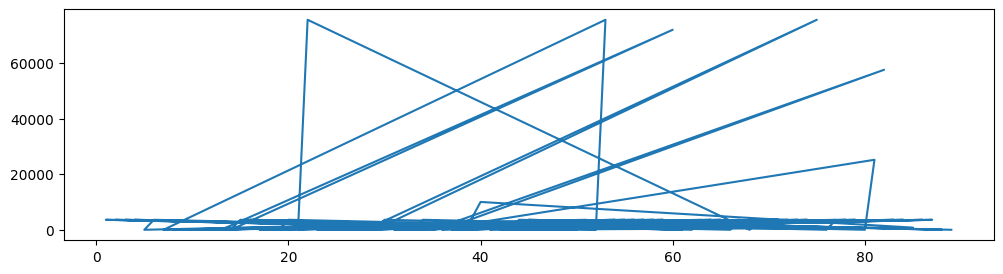

In [ ]:
df_meo1["dt"].plot(figsize=(12,3)) # creates a line graph that visually shows you how the time diff btw gnss data points vary over time

In [ ]:
df_meo2['utc_time'] = pd.to_datetime(df_meo2['utc_time']) # convert the string to date time value
df_meo2 = df_meo2.sort_values(by="utc_time") # sort the rows with respect to utc time
df_meo2['dt'] = df_meo2["utc_time"].diff().dt.total_seconds() # the diff in time duration btw timestamps
print(df_meo2.head(5))
df_meo2.describe() # describe the dataset

               utc_time   x_error   y_error   z_error  satclockerror  \
0   2025-09-03 10:11:00 -0.026800  0.073632  0.078433       0.008539   
1   2025-09-03 10:21:00 -0.085093  0.038818  0.082896      -0.006356   
143 2025-09-03 10:21:00 -0.085093  0.038818  0.082896      -0.006356   
2   2025-09-03 10:31:00 -0.098012  0.039264  0.114348       0.011094   
144 2025-09-03 10:31:00 -0.098012  0.039264  0.114348       0.011094   

     residual     dt  
0    0.110867    NaN  
1    0.124978  600.0  
143  0.124978    0.0  
2    0.155639  600.0  
144  0.155639    0.0  


,utc_time,x_error,y_error,z_error,satclockerror,residual,dt
count,244,244.000000,244.000000,244.000000,244.000000,244.000000,243.000000
mean,2025-09-06 23:47:38.360655616,-0.136127,0.010701,-0.009660,0.000876,0.251490,2155.555556
min,2025-09-03 10:11:00,-1.121685,-0.997851,-0.845666,-0.142840,0.034890,0.000000
25%,2025-09-06 00:42:00,-0.163999,-0.078455,-0.111936,-0.010707,0.129997,0.000000
50%,2025-09-07 14:31:00,-0.096386,0.017249,0.016111,-0.006356,0.191644,420.000000
75%,2025-09-09 00:19:30,-0.052221,0.072948,0.112286,0.016220,0.250697,600.000000
max,2025-09-09 11:41:00,0.173257,0.935234,0.926893,0.184572,1.446413,93360.000000
std,NaN,0.173809,0.183145,0.200826,0.030242,0.243702,11329.062459


<Axes: >

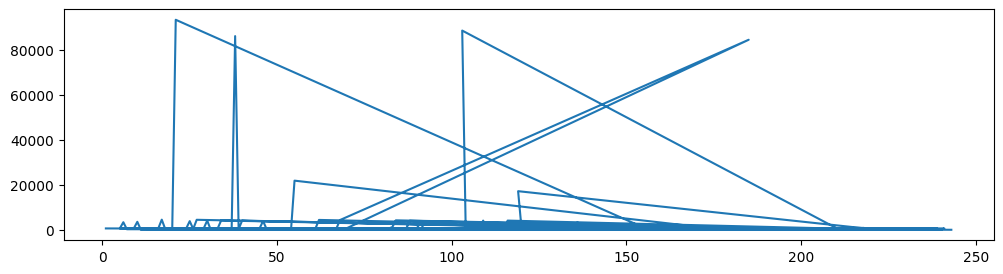

In [ ]:
df_meo2["dt"].plot(figsize=(12,3)) # creates a line graph that visually shows you how the time diff btw gnss data points vary over time

In [ ]:
common_cols = list(set(df_meo1.columns).intersection(df_meo2.columns)) # extract the common cols
df_meo1 = df_meo1[common_cols] # keep the common cols alone
df_meo2 = df_meo2[common_cols] # keep the common cols alone
df_meo = pd.concat([df_meo1,df_meo2],axis=0,ignore_index=True) # combine the two meo's
df_meo.to_csv("/content/meo_combined.csv", index=False) # save it
print("Combined shape : ",df_meo.shape)
print("Saved as meo_combined.csv")

Combined shape :  (334, 7)
Saved as meo_combined.csv


In [ ]:
df_meo["utc_time"] = pd.to_datetime(df_meo["utc_time"])
df_meo = df_meo.sort_values("utc_time")
df_meo["dt"] = df_meo["utc_time"].diff().dt.total_seconds() # the diff in time duration btw timestamps in secs
print(df_meo.head(5))
df_meo.describe()

    x_error   z_error      dt  satclockerror   y_error  residual  \
0 -0.765883  0.434251     NaN      -0.183989  0.671544  1.107304   
1 -0.765883  0.434251     0.0      -0.183989  0.671544  1.107304   
2 -0.568186  0.637844  3600.0      -0.159422  0.392191  0.939943   
3 -0.568186  0.637844     0.0      -0.159422  0.392191  0.939943   
4 -0.535862  0.723323  3600.0       0.035761  0.174319  0.916914   

             utc_time  
0 2025-09-01 14:00:00  
1 2025-09-01 14:00:00  
2 2025-09-01 15:00:00  
3 2025-09-01 15:00:00  
4 2025-09-01 16:00:00  


,x_error,z_error,dt,satclockerror,y_error,residual,utc_time
count,334.000000,334.000000,333.000000,334.000000,334.000000,334.000000,334
mean,-0.255814,-0.000824,2050.630631,0.011321,0.065207,0.458527,2025-09-06 08:43:55.508982016
min,-2.270492,-0.867343,0.000000,-0.730753,-0.997851,0.034890,2025-09-01 14:00:00
25%,-0.422352,-0.136221,0.000000,-0.018680,-0.079687,0.144527,2025-09-04 18:27:00
50%,-0.141376,0.020780,360.000000,-0.006356,0.038281,0.236016,2025-09-06 10:46:00
75%,-0.064866,0.137735,600.000000,0.025990,0.106916,0.921598,2025-09-07 20:58:30
max,0.173257,0.926893,88560.000000,1.576007,0.943559,2.459053,2025-09-09 11:41:00
std,0.298112,0.362411,8873.720435,0.184481,0.298535,0.410317,NaN


<Axes: >

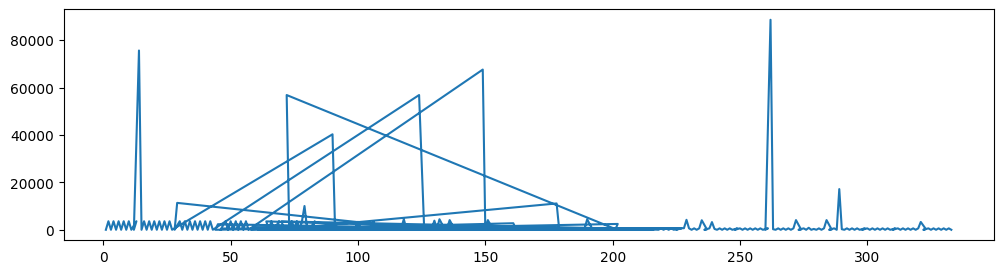

In [ ]:
df_meo["dt"].plot(figsize=(12,3)) # creates a line graph that visually shows you how the time diff btw gnss data points vary over time

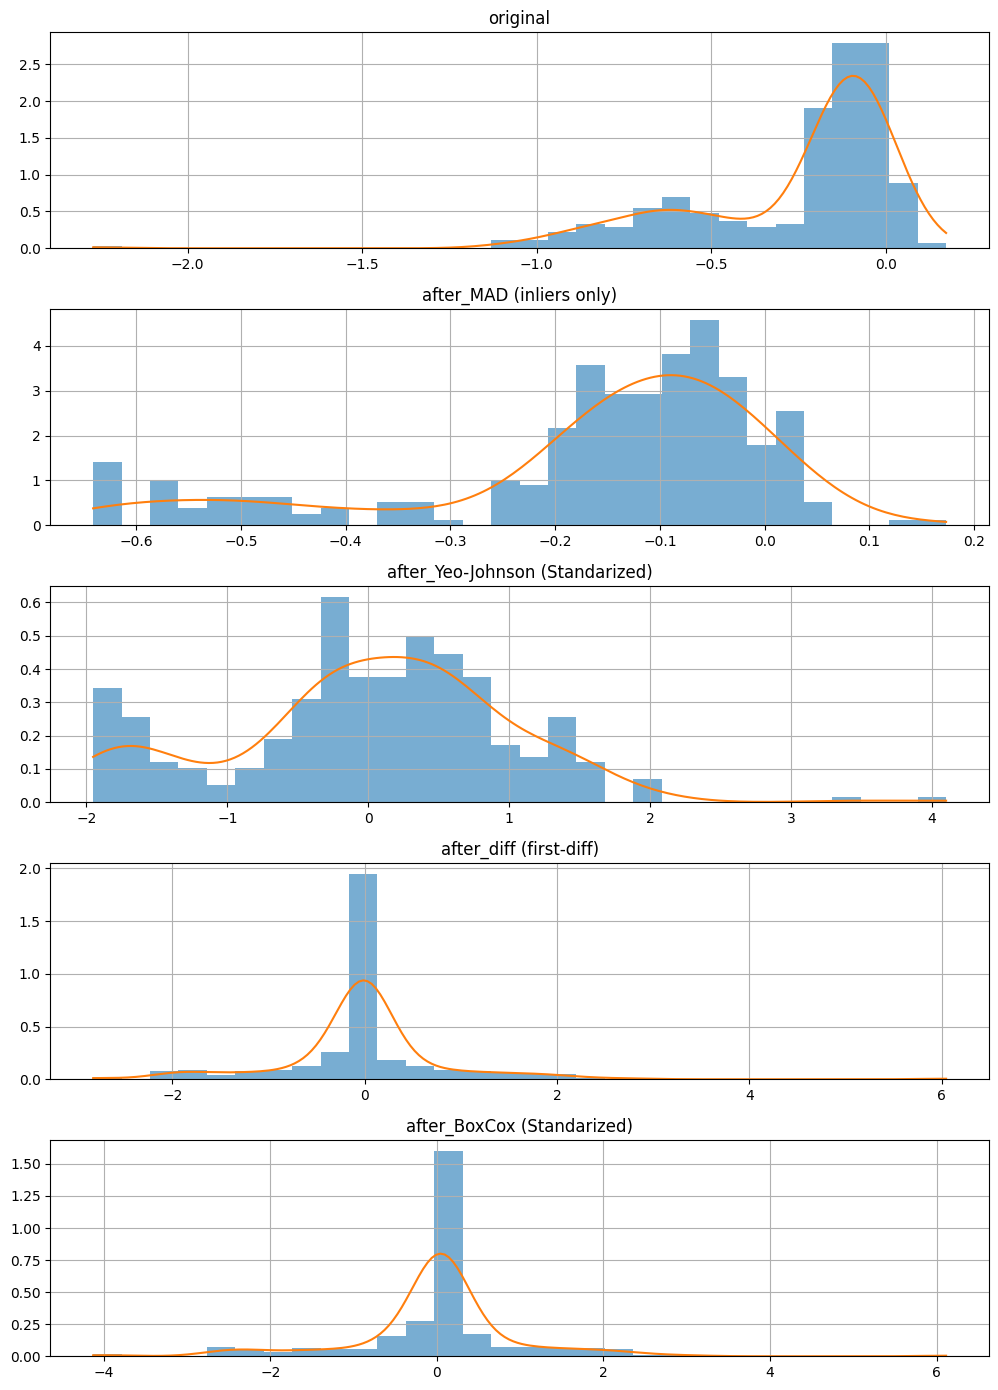

<Figure size 600x600 with 0 Axes>

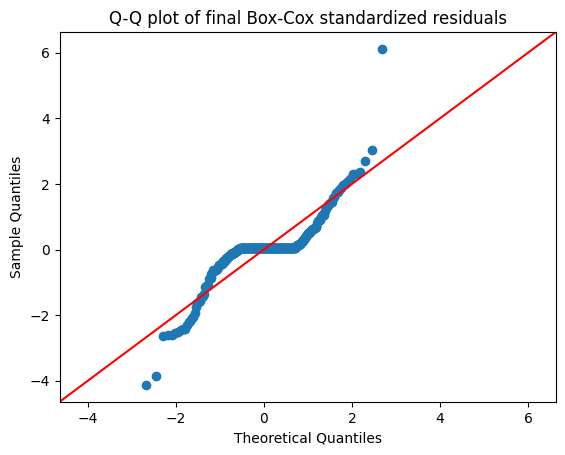


===== FINAL SHAPIRO-WILK NORMALITY TEST (Pipeline Output) =====
Statistic: 0.790790
P-value :  0.000000
Verdict :  Not Gaussian


In [ ]:
# Gaussianization for a single GNSS feature (x_error)
# pipeline : MAD outlier removal -> Yeo Johnson -> first-difference -> Box-Cox -> Shapiro-Wilk

import numpy as np # numerical array and maths
import pandas as pd # Tabular data (DataFrame, Series)
from scipy import stats # Statistical functions (skew, boxcox, shapiro,etc)
import scipy.stats as st
from scipy.stats import shapiro
from scipy.stats.mstats import winsorize # Winsorization for robust tail-trimming
from sklearn.preprocessing import PowerTransformer # Yeo-Johnson transform
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # Nicer statistical plots
import warnings # To suppress or emit warnings
from typing import Dict,Any,Tuple,Optional # for type hints

def mad_zscore_mark(x: np.ndarray,threshold: float = 3.5) -> np.ndarray:
  """
  Compute a boolean mask of inliers using MAD (Median Absolute Deviation) z_score.

  Let x_i be a data point then median = med(x) and MAD = med(|x_i - median|)
  Modified z-score: z_i = 0.67448975 * (x_i - median) / MAD (here 0.67448975 is approximately Φ^{-1}(0.75), making MAD comparable to σ under Gaussian assumptions)
  We flag as inlier if |z_i| <= threshold (default 3.5: conservative for heavy tails)
  """
  x = np.asarray(x) # ensure x is a numpy array
  mask = ~np.isnan(x) # mask -> true where x is not Nan
  if mask.sum() == 0: # no valid data
    return np.zeros_like(mask,dtype=bool)

  vals = x[mask]
  med = np.median(vals)
  mad = np.median(np.abs(vals-med))

  if mad == 0:
    std = np.std(vals)
    if std == 0:
      return mask
    z = (vals - med)/std
    keep = np.abs(z) <= threshold
  else:
    mod_z = 0.67448975 * (vals - med)/mad
    keep = np.abs(mod_z) <= threshold

  full_mask = np.zeros_like(mask, dtype=bool)
  full_mask[np.where(mask)[0]] = keep
  return full_mask

def safe_power_transform_yeojohnson(series: pd.Series) -> Tuple[pd.Series, PowerTransformer]:
  """
  Yeo-Johnson is a power transform (like Box-Cox) but:
    - works for both positive and negative values
    - tries to reduce skewness and stabilize variance

  the actual formula has four cases, depending on the sign of x and λ (lambda)
  but sklearn's PowerTransformer handles all those details internally

  it returns a transformed values and fitted transformer object
  """

  x = series.values.reshape(-1,1).astype(float) # convert to (n_samples,1) 2D array as required by sklearn
  pt = PowerTransformer(method="yeo-johnson",standardize=False) # do not standardize automatically

  with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=RuntimeWarning)
    x_t = pt.fit_transform(x)

  out = pd.Series(x_t.flatten(), index=series.index)
  return out, pt

def transform_boxcox(series: pd.Series,eps: float = 1e-9) -> Tuple[pd.Series, float, float]:
  """
  Apply Box-Cox transform safely by shifting the data into the positive domain.

  For a given λ (lambda),
    if λ != 0:
        y = (x^λ - 1) / λ
    if λ == 0:
        y = log(x)

  return the transformed data,estimated lambda and the constant that was added to orginal series before Box-Cox.
  """

  arr = series.dropna().values.astype(float) # drop nan before transformation
  if arr.size == 0:
    return pd.Series(index=series.index, dtype=float), np.nan, 0.0 # no data return empty series

  shift = 0.0 # compute shift so that all values become > 0
  minv = np.min(arr)
  if minv <= 0:
    shift = abs(minv) + eps
  arr_shifted = arr + shift

  # if after shift all values are almost constant, Box-Cox is not informative
  if np.allclose(arr_shifted, arr_shifted[0]):
    transformed = np.zeros_like(arr_shifted) # in this degenerate case output zeros; λ is not meaningful
    lam = np.nan
  else:
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        transformed, lam = stats.boxcox(arr_shifted)

  out = pd.Series(index=series.index, dtype=float)
  out.loc[series.dropna().index] = transformed

  return out, float(lam) if not np.isnan(lam) else np.nan, float(shift)

def shapiro_check(series: pd.Series) -> Dict[str, Any]:
  """
  Shapiro–Wilk:
      - H0: data are drawn from a Normal distribution.
      - H1: data are NOT Normal.
      - If p-value > 0.05 → fail to reject H0 → 'Gaussian' (under 5% level).
      - If p-value <= 0.05 → reject H0 → 'Not Gaussian'.

  Note: This is not optimal for larger n (>5000)
  """

  arr = series.dropna().values.astype(float)
  if arr.size == 0:
    return {"stat":np.nan, "pvalue":np.nan, "verdict":"no-data"}
  if arr.size < 3:
    return {"stat":np.nan, "pvalue":np.nan, "verdict":"too-few-samples"}

  stat, pvalue = stats.shapiro(arr)
  verdict = "Gaussian" if pvalue > 0.05 else "Not Gaussian"
  return {"stat":float(stat), "pvalue":float(pvalue), "verdict":verdict}

def plot_stage_hist(series_dict: Dict[str, pd.Series], bins: int = 30, figsize=(12,8)):
  """
  helper function to plot histograms and kde curves for multiple transformation stages.
  """
  n = len(series_dict)
  fig, axes = plt.subplots(n, 1, figsize=figsize)
  if n == 1:
      axes = [axes]

  for ax, (name, s) in zip(axes, series_dict.items()):
      arr = s.dropna().values

      if arr.size == 0:
          ax.text(0.5, 0.5, f"No data for {name}", ha="center", va="center")
          ax.set_title(name)
          ax.grid(True)
          continue

      ax.hist(arr, bins=bins, density=True, alpha=0.6)

      try:
          kde = stats.gaussian_kde(arr)
          xs = np.linspace(arr.min(), arr.max(), 200)
          ax.plot(xs, kde(xs), lw=1.5)
      except Exception:
          pass

      ax.set_title(name)
      ax.grid(True)

  plt.tight_layout()
  plt.show()

def pipeline(series: pd.Series,mad_threshold: float = 3.5,do_plot: bool = True) -> Dict[str, Any]:
  """
    MAD-based outlier removal (robust to heavy tails / outliers).
    Yeo–Johnson transform to reduce skew and stabilize variance.
    Standardization (mean 0, variance 1).
    First-difference (d_t = x_t - x_{t-1}) to reduce autocorrelation.
    Box–Cox transform on differenced series (with shifting to positivity).
    Final standardization and Shapiro–Wilk normality test.
  """
  res: Dict[str, Any] = {}
  s = series.copy().astype(float) # make a copy to avoid modifying caller's series

  res["n_total"] = int(s.notna().sum())
  res["median_before"] = float(s.dropna().median()) if s.notna().any() else np.nan
  res["mean_before"] = float(s.dropna().mean()) if s.notna().any() else np.nan

  mask = mad_zscore_mark(s.values,mad_threshold)
  s_mad = s.copy()
  s_mad[~mask] = np.nan # replace outliers with Nan

  res["inliers_mask"] = mask
  res["n_kep_after_mad"] = int(np.sum(mask))
  res["percent_removed"] = float(100.0 * (1.0 - np.sum(mask) / max(1.0,s.notna().sum())))

  res["skew_before"] = float(stats.skew(s.dropna().values)) if s.notna().any() else np.nan
  res["skew_after_mad"] = float(stats.skew(s_mad.dropna().values)) if s_mad.notna().any() else np.nan

  yj_series, yj_transformer = safe_power_transform_yeojohnson(s_mad)

  if yj_series.dropna().size > 0:
    std_val = yj_series.std(ddof=0)
    if std_val == 0:
      std_val = 1.0 # avoid division by zero
    yj_std = (yj_series - yj_series.mean()) / std_val
  else:
    yj_std = yj_series.copy()

  res["yj_lambda"] = float(yj_transformer.lambdas_[0]) if hasattr(yj_transformer, "lambdas_") else np.nan
  res["skew_after_yj"] = float(stats.skew(yj_std.dropna().values)) if yj_std.notna().any() else np.nan

  yj_idx = yj_std.index
  yj_vals = yj_std.values
  diff_vals = np.full_like(yj_vals, np.nan, dtype=float)

  if yj_vals.size > 1:
    for i in range(1,len(yj_vals)):
      if not np.isnan(yj_vals[i]) and not np.isnan(yj_vals[i-1]):
        diff_vals[i] = yj_vals[i] - yj_vals[i-1]
      else:
        diff_vals[i] = np.nan

  diff_series = pd.Series(diff_vals, index=yj_idx)
  res["skew_after_diff"] = float(stats.skew(diff_series.dropna().values)) if diff_series.notna().any() else np.nan

  boxcox_series, boxcox_lambda, boxcox_shift = transform_boxcox(diff_series)

  if boxcox_series.dropna().size > 0:
    std_bc = boxcox_series.std(ddof=0)
    if std_bc == 0:
      std_bc = 1.0 # avoid division by zero
    boxcox_std = (boxcox_series - boxcox_series.mean()) / std_bc
  else:
    boxcox_std = boxcox_series.copy()

  res["boxcox_lambda"] = boxcox_lambda
  res["boxcox_shift"] = boxcox_shift
  res["skew_after_boxcox"] = float(stats.skew(boxcox_std.dropna().values))

  sw = shapiro_check(boxcox_std)
  res["shapiro_final"] = sw

  res["series_original"] = s
  res["series_after_mad"] = s_mad
  res["series_after_yj"] = yj_std
  res["series_after_diff"] = diff_series
  res["series_after_boxcox"] = boxcox_std

  if do_plot:
    plot_dict = {
        "original":s,
        "after_MAD (inliers only)":s_mad,
        "after_Yeo-Johnson (Standarized)":yj_std,
        "after_diff (first-diff)":diff_series,
        "after_BoxCox (Standarized)":boxcox_std
    }
    plot_stage_hist(plot_dict, bins=30, figsize=(10,14))

    import statsmodels.api as sm
    final_vals = boxcox_std.dropna().values
    if final_vals.size >= 3:
      plt.figure(figsize=(6,6))
      sm.qqplot(final_vals, line="45",fit=True)
      plt.title("Q-Q plot of final Box-Cox standardized residuals")
      plt.show()
    else:
      print("[i] Not enough samples for Q-Q plot of final series.")

  return res

res = pipeline(df_meo["x_error"],mad_threshold=3.5,do_plot=True)
print("\n===== FINAL SHAPIRO-WILK NORMALITY TEST (Pipeline Output) =====")
print(f"Statistic: {res['shapiro_final']['stat']:.6f}")
print(f"P-value :  {res['shapiro_final']['pvalue']:.6f}")
print(f"Verdict :  {res['shapiro_final']['verdict']}")


In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import shapiro
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

def shapiro_safe(arr):
  arr = np.asarray(arr)
  if len(arr) > 5000:
    arr = np.random.choice(arr,5000,replace = False)
  return shapiro(arr)

series = df_meo["x_error"].dropna().astype(float)

print("\n --- Step 1 Diagonise raw features ---\n")
print("n =",len(series))
print("unique value =",series.nunique())
print("\nTop 10 repeated value: ")
print(series.value_counts().head(10))
print("\nPercentiles: ")
print(np.percentile(series, [0,1,2,50,95,99,100]))

diff_series = series.diff().dropna()
print("n_diff :",len(diff_series))
print("unique :",diff_series.nunique())
print("percentiles :",np.percentile(diff_series, [0,1,2,50,95,99,100]))

# --- Experiment 1 First Difference ---

print("\n--- Experiment 1 First Difference ---\n")

if diff_series.nunique() <= 2:
  print("Warning: First difference colapses into few unique value -> plateau inevitable")

try:
  shift = 0 if diff_series.min() > 0 else abs(diff_series.min()) + 1e-9
  diff_shift = diff_series + shift
  bc1, lam1 = st.boxcox(diff_shift)
  bc1_std = (bc1 - bc1.mean()) / bc1.std()
  stat1, p1 = shapiro_safe(bc1_std)
except:
  lam1, p1 = None, 0
  print("Box-Cox failed due to tries or non-positive values")

print("\nBox-Cox lambda:",lam1)
print("Shapiro p (after Box-Cox on diff):",p1)

# --- Experiment 2 Winsorize -> Box-Cox ---

print("\n--- Experiment 3 Winsorize -> Box-Cox ---\n")
arr = diff_series.values
arr_w = winsorize(arr, limits=(0.01,0.01)).data

shift = 0 if arr_w.min() > 0 else abs(arr_w.min()) + 1e-9
try:
  bc2, lam2 = st.boxcox(arr_w + shift)
  bc2_std = (bc2 - bc2.mean()) / bc2.std()
  stat2, p2 = shapiro_safe(bc2_std)
  print("lamda of Winsor :",lam2)
  print("Shapiro p (winsor) :",p2)
except:
  print("Winsorized Box-Cox failed")
  p2 = 0

# --- Experiment 3 Rank Gaussianization (Normal Score Transform) ---

print("\n--- Experiment 3 Rank Gaussianization (Normal Score Transform) ---\n")

x = series.values
ranks = st.rankdata(x)
u = (ranks - 0.5) / len(x)
rank_gauss = st.norm.ppf(u)
rank_gauss_std = (rank_gauss - rank_gauss.mean()) / rank_gauss.std()
stat3, p3 = shapiro_safe(rank_gauss_std)

print("Shapiro p (rank-gauss):",p3)

# --- Experiment 4 Yeo-Johnson + Robust Scaling ---

print("\n--- Experiment 4 Yeo-Johnson + Robust Scaling ---\n")

pt = PowerTransformer(method="yeo-johnson",standardize = False)
yj = pt.fit_transform(series.values.reshape(-1,1)).flatten()

med = np.median(yj)
mad = np.median(np.abs(yj - med))
yj_robust = (yj - med) / (mad if mad > 1e-9 else 1)

stat4, p4 = shapiro_safe(yj_robust)

print("Yeo-Johnson lambda :",pt.lambdas_[0])
print("Shapiro p (YJ + robust) :",p4)

# --- Final Summary ---

print("\n--- Final Summary ---\n")

print(f"1) Diff -> Box-Cox: p = {p1:.4f}")
print(f"2) Winsorize -> Box-Cox: p = {p2:.4}")
print(f"3) Rank Gaussianization: p = {p3:.4}")
print(f"4) Yeo-Johnson + Robust: p = {p4:.4}")

print("\nVerdict:")
best = max([p for p in [p1,p2,p3,p4] if p is not None])

if best > 0.05:
  print("At least one transformation achieved normality")
  if best == p1:
    print(" -> Best method : Diff -> Box-Cox")
  elif best == p2:
    print(" -> Best method : Winsorize -> Box-Cox")
  elif best == p3:
    print(" -> Best method : Rank Gaussianization")
  elif best == p4:
    print(" -> Best method : Yeo-Johnson + Robust")
else:
  print("None reached p > 0.05 -> Feature is non-Gaussian")


 --- Step 1 Diagonise raw features ---

n = 334
unique value = 189

Top 10 repeated value: 
x_error
-0.765883    2
-0.568186    2
-0.535862    2
-0.641200    2
-0.638888    2
-0.774363    2
-0.837601    2
-0.335358    2
-0.412536    2
-0.702045    2
Name: count, dtype: int64

Percentiles: 
[-2.27049219 -1.04328247 -0.95094393 -0.14137566  0.01692242  0.05791221
  0.17325745]
n_diff : 333
unique : 189
percentiles : [-1.60403072 -0.74761897 -0.60633919  0.          0.37694301  0.84247976
  1.33576454]

--- Experiment 1 First Difference ---


Box-Cox lambda: 1.050471765377128
Shapiro p (after Box-Cox on diff): 9.655100292336422e-24

--- Experiment 3 Winsorize -> Box-Cox ---

lamda of Winsor : 0.789028117738629
Shapiro p (winsor) : 1.010791768703418e-22

--- Experiment 3 Rank Gaussianization (Normal Score Transform) ---

Shapiro p (rank-gauss): 0.9999999999900561

--- Experiment 4 Yeo-Johnson + Robust Scaling ---

Yeo-Johnson lambda : 4.674492763208403
Shapiro p (YJ + robust) : 3.69953153

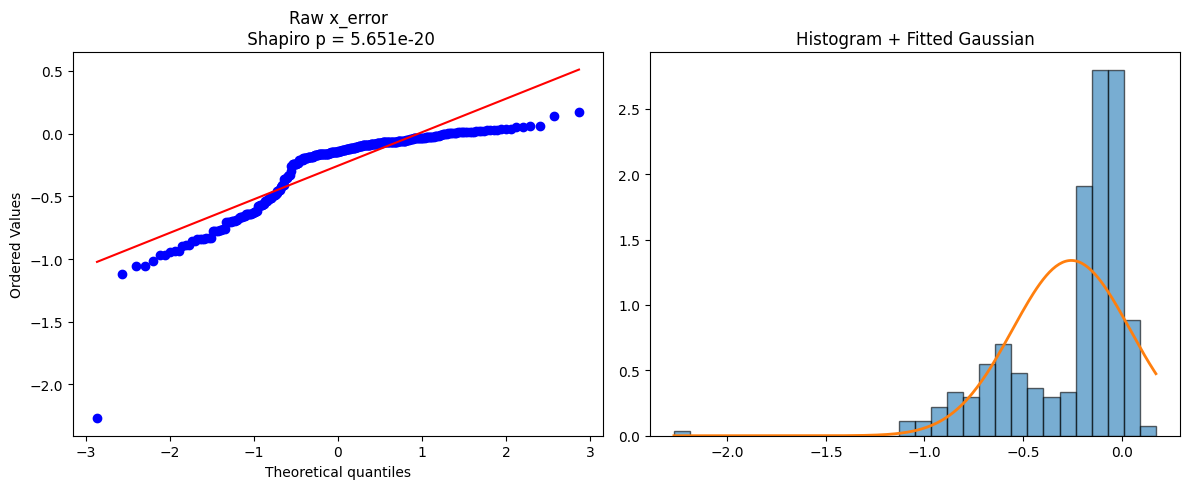

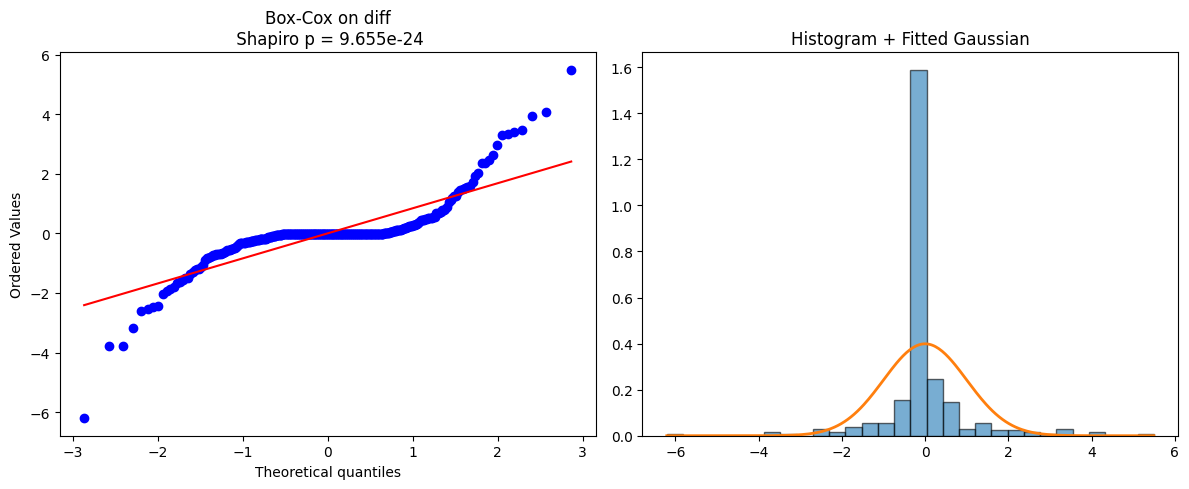

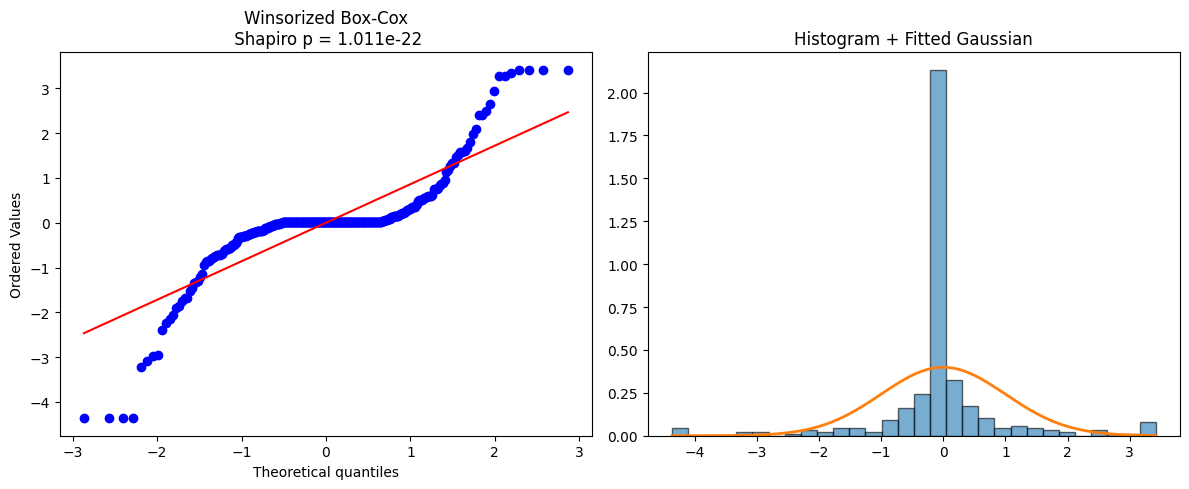

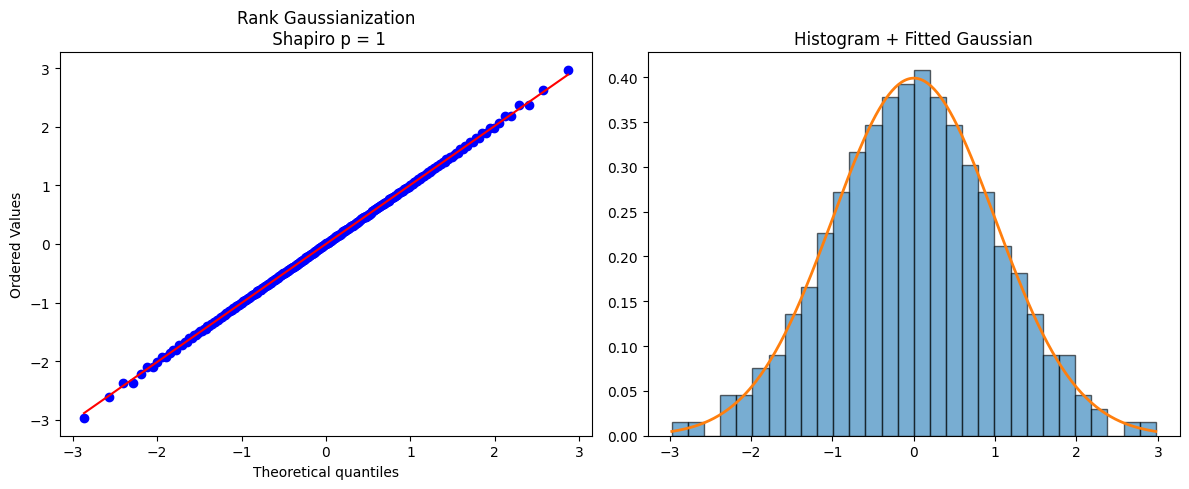

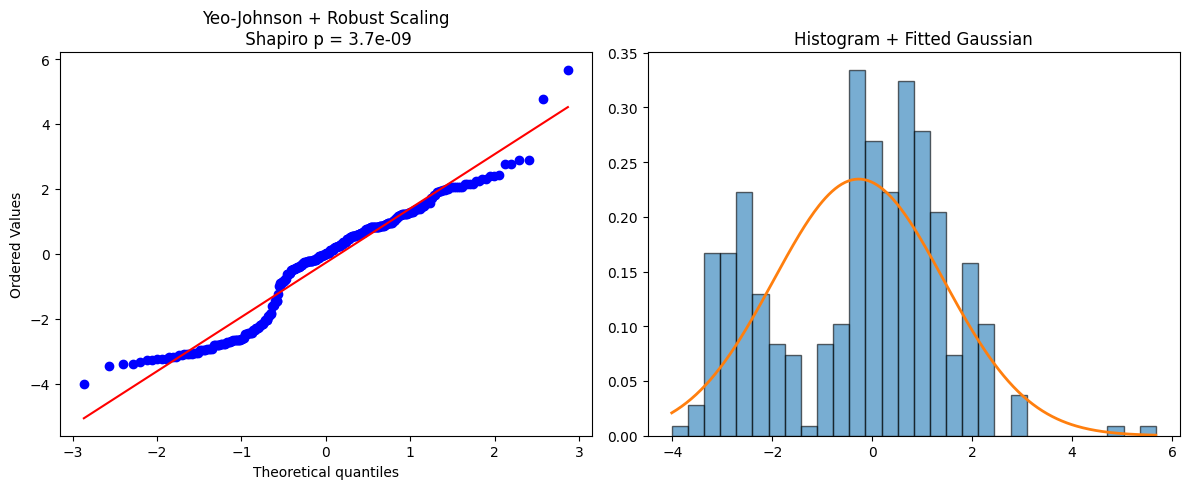

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats.mstats import winsorize

def qq_hist_with_curves(data,title,pvalue):
  dat = np.asarray(data).astype(float)
  dat = data[~np.isnan(data)]

  fig, ax = plt.subplots(1,2,figsize=(12,5))

  st.probplot(data,dist="norm",plot = ax[0])
  ax[0].set_title(f"{title}\n Shapiro p = {pvalue:.4g}")

  ax[1].hist(data,bins=30,density = True,alpha = 0.6,edgecolor = "black")

  mu = np.mean(data)
  sigma = np.std(data)

  x = np.linspace(data.min(),data.max(),300)
  pdf = st.norm.pdf(x,loc=mu,scale=sigma)

  ax[1].plot(x,pdf,linewidth=2)
  ax[1].set_title(f"Histogram + Fitted Gaussian")

  plt.tight_layout()
  plt.show()

def shapiro_safe(arr):
  arr = np.asarray(arr)
  if len(arr) > 5000:
    arr = np.random.choice(arr,5000,replace = False)
  return shapiro(arr)

series = df_meo["x_error"].dropna().astype(float)

stat_raw, p_raw = shapiro_safe(series)
qq_hist_with_curves(series,"Raw x_error",p_raw)

# --- Diff -> Box-Cox ---

diff = diff_series.dropna().values
shift = 0 if diff.min() > 0 else abs(diff.min()) + 1e-9

try:
  bc1, lam1 = st.boxcox(diff_shift)
  bc1_std = (bc1 - bc1.mean()) / bc1.std()
  stat1, p1 = shapiro_safe(bc1_std)
  qq_hist_with_curves(bc1_std,"Box-Cox on diff",p1)
except:
  pass

# --- Winsorize -> Box-Cox ---

arr_w = winsorize(diff,limits=(0.01,0.01)).data
shift2 = 0 if arr_w.min() > 0 else abs(arr_w.min()) + 1e-9

bc2, lam2 = st.boxcox(arr_w + shift2)
bc2_std = (bc2 - bc2.mean()) / bc2.std()
stat2, p2 = shapiro_safe(bc2_std)
qq_hist_with_curves(bc2_std,"Winsorized Box-Cox",p2)

# --- Rank Gaussianization ---

x = series.values
ranks = st.rankdata(x)
u = (ranks - 0.5) / len(x)
rank_gauss = st.norm.ppf(u)
rank_gauss_std = (rank_gauss - rank_gauss.mean()) / rank_gauss.std()
stat3, p3 = shapiro_safe(rank_gauss_std)
qq_hist_with_curves(rank_gauss_std,"Rank Gaussianization",p3)

# --- Yeo-Johnson + Robust Scaling ---

pt = PowerTransformer(method="yeo-johnson",standardize = False)
yj = pt.fit_transform(series.values.reshape(-1,1)).flatten()

med = np.median(yj)
mad = np.median(np.abs(yj - med))
yj_robust = (yj - med) / (mad if mad > 1e-9 else 1)

stat4, p4 = shapiro_safe(yj_robust)
qq_hist_with_curves(yj_robust,"Yeo-Johnson + Robust Scaling",p4)


In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import shapiro
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

def shapiro_safe(arr):
  arr = np.asarray(arr)
  arr = arr[~np.isnan(arr)]
  if len(arr) == 0:
    return np.nan, np.nan
  if len(arr) > 5000:
    arr = np.random.choice(arr,5000,replace=False)
  return shapiro(arr)

def qq_hist_with_curves(data,title,pvalue):
  data = np.asarray(data).astype(float)
  data = data[~np.isnan(data)]

  if data.size == 0:
    print(f"[i] No data for {title}, skip plots.")
    return

  fig, ax = plt.subplots(1,2,figsize=(12,5))

  st.probplot(data,dist="norm",plot=ax[0])
  ax[0].set_title(f"{title}\n Shapiro p = {pvalue:.4g}")

  ax[1].hist(data,bins=30,density=True,alpha=0.6,edgecolor="black")

  mu = np.mean(data)
  sigma = np.std(data)
  if sigma == 0:
    sigma = 1.0

  x = np.linspace(data.min(),data.max(),300)
  pdf = st.norm.pdf(x,loc=mu,scale=sigma)

  ax[1].plot(x,pdf,linewidth=2)
  ax[1].set_title("Histogram + Fitted Gaussian")

  plt.tight_layout()
  plt.show()

def _zscore(x):
  x = np.asarray(x, dtype=float)
  mu = x.mean()
  sd = x.std(ddof=0)
  return (x - mu) / (sd if sd > 1e-12 else 1.0)

def gaussianize_pipeline(series, feature_name=None):
  series = series.dropna().astype(float)
  if feature_name is None:
    feature_name = str(getattr(series, "name", "feature"))

  print(f"\n --- Step 1 Diagnose raw feature ({feature_name}) ---\n")
  print("n =", len(series))
  print("unique value =", series.nunique())
  print("\nTop 10 repeated value:")
  print(series.value_counts().head(10))
  print("\nPercentiles:")
  print(np.percentile(series.values, [0,1,2,50,95,99,100]))

  diff_series = series.diff().dropna()
  print("\nn_diff:", len(diff_series))
  print("unique:", diff_series.nunique())
  print("percentiles:", np.percentile(diff_series.values, [0,1,2,50,95,99,100]))

  # raw
  stat_raw, p_raw = shapiro_safe(series.values)
  print("\nShapiro p (raw):", p_raw)
  qq_hist_with_curves(series.values, f"Raw {feature_name}", p_raw)

  # --- Exp 1: Diff -> Box-Cox ---
  print("\n--- Experiment 1: Diff -> Box-Cox ---\n")
  diff_vals = diff_series.values
  try:
    shift1 = 0.0 if diff_vals.min() > 0 else (-diff_vals.min()) + 1e-9
    diff_shift = diff_vals + shift1
    bc1, lam1 = st.boxcox(diff_shift)
    bc1_std = _zscore(bc1)
    stat1, p1 = shapiro_safe(bc1_std)
    print("Box-Cox lambda:", lam1)
    print("Shapiro p:", p1)
    qq_hist_with_curves(bc1_std, f"Box-Cox on diff ({feature_name})", p1)
  except Exception as e:
    lam1, p1 = None, 0.0
    print("Box-Cox failed:", e)

  # --- Exp 2: Winsorize -> Box-Cox ---
  print("\n--- Experiment 2: Winsorize -> Box-Cox ---\n")
  try:
    arr_w = winsorize(diff_vals, limits=(0.01, 0.01)).data
    arr_w = np.asarray(arr_w, dtype=float)
    shift2 = 0.0 if arr_w.min() > 0 else (-arr_w.min()) + 1e-9
    bc2, lam2 = st.boxcox(arr_w + shift2)
    bc2_std = _zscore(bc2)
    stat2, p2 = shapiro_safe(bc2_std)
    print("Winsor Box-Cox lambda:", lam2)
    print("Shapiro p:", p2)
    qq_hist_with_curves(bc2_std, f"Winsorized Box-Cox ({feature_name})", p2)
  except Exception as e:
    lam2, p2 = None, 0.0
    print("Winsorized Box-Cox failed:", e)

  # --- Exp 3: Rank Gaussianization ---
  print("\n--- Experiment 3: Rank Gaussianization ---\n")
  x = series.values
  ranks = st.rankdata(x)
  u = (ranks - 0.5) / len(x)
  u = np.clip(u, 1e-9, 1 - 1e-9)
  rg = st.norm.ppf(u)
  rg_std = _zscore(rg)
  stat3, p3 = shapiro_safe(rg_std)
  print("Shapiro p (rank-gauss):", p3)
  qq_hist_with_curves(rg_std, f"Rank Gaussianization ({feature_name})", p3)

  # --- Exp 4: Yeo-Johnson + Robust ---
  print("\n--- Experiment 4: Yeo-Johnson + Robust ---\n")
  pt = PowerTransformer(method="yeo-johnson", standardize=False)
  yj = pt.fit_transform(series.values.reshape(-1,1)).ravel()
  med = np.median(yj)
  mad = np.median(np.abs(yj - med))
  yj_robust = (yj - med) / (mad if mad > 1e-9 else 1.0)
  stat4, p4 = shapiro_safe(yj_robust)
  print("Yeo-Johnson lambda:", pt.lambdas_[0])
  print("Shapiro p:", p4)
  qq_hist_with_curves(yj_robust, f"Yeo-Johnson + Robust ({feature_name})", p4)

  # Summary
  print("\n--- Final Summary ---\n")
  print(f"raw: p = {p_raw:.4g}")
  print(f"1) Diff -> Box-Cox: p = {p1:.4g} (λ={lam1})")
  print(f"2) Winsorize -> Box-Cox: p = {p2:.4g} (λ={lam2})")
  print(f"3) Rank Gaussianization: p = {p3:.4g}")
  print(f"4) Yeo-Johnson + Robust: p = {p4:.4g} (λ={pt.lambdas_[0]:.6f})")

  best = max([p1, p2, p3, p4])
  labels = {p1:"Diff->BoxCox", p2:"Winsor->BoxCox", p3:"RankGauss", p4:"YeoJohnson+Robust"}

  if best == p1:
    return pd.Series(bc1_std, index=diff_series.index, name=f"{feature_name}_gauss")
  elif best == p2:
    return pd.Series(bc2_std, index=diff_series.index, name=f"{feature_name}_gauss")
  elif best == p3:
    return pd.Series(rg_std, index=series.index, name=f"{feature_name}_gauss")
  else:
    return pd.Series(yj_robust, index=series.index, name=f"{feature_name}_gauss")

  print("\nVerdict:")
  if best > 0.05:
    print("At least one transformation achieved normality.")
    print("Best method:", labels[best])
  else:
    print("None reached p > 0.05 -> Feature is non-Gaussian.")


 --- Step 1 Diagnose raw feature (x_error) ---

n = 334
unique value = 189

Top 10 repeated value:
x_error
-0.765883    2
-0.568186    2
-0.535862    2
-0.641200    2
-0.638888    2
-0.774363    2
-0.837601    2
-0.335358    2
-0.412536    2
-0.702045    2
Name: count, dtype: int64

Percentiles:
[-2.27049219 -1.04328247 -0.95094393 -0.14137566  0.01692242  0.05791221
  0.17325745]

n_diff: 333
unique: 189
percentiles: [-1.60403072 -0.74761897 -0.60633919  0.          0.37694301  0.84247976
  1.33576454]

Shapiro p (raw): 5.651434216950341e-20


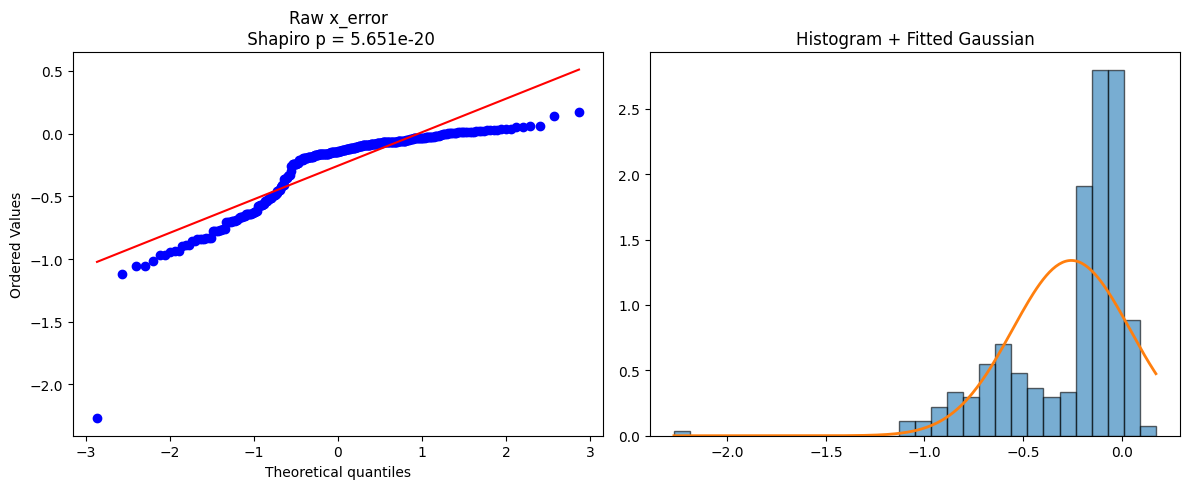


--- Experiment 1: Diff -> Box-Cox ---

Box-Cox lambda: 1.050471765377128
Shapiro p: 9.655100292336422e-24


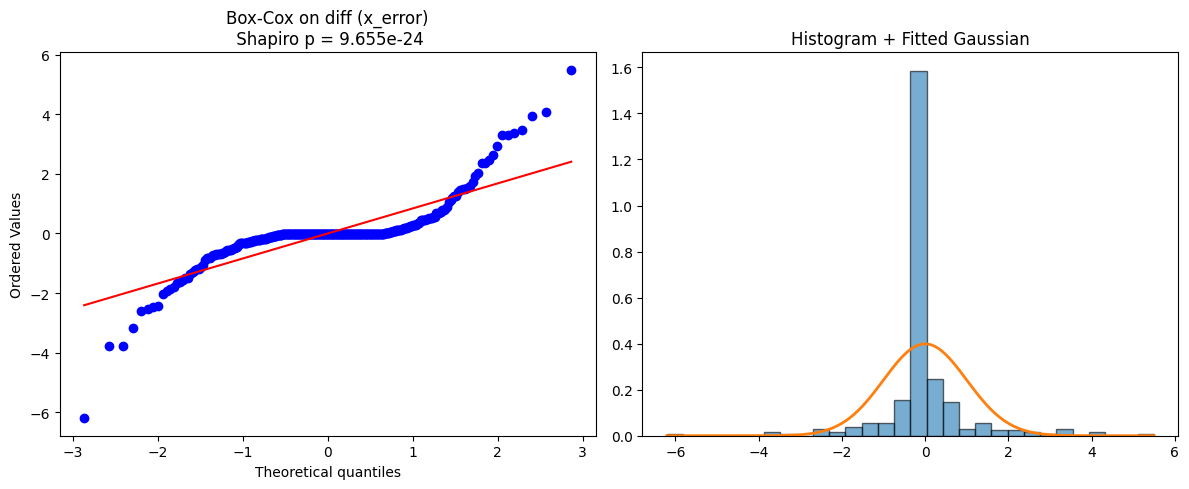


--- Experiment 2: Winsorize -> Box-Cox ---

Winsor Box-Cox lambda: 0.789028117738629
Shapiro p: 1.010791768703418e-22


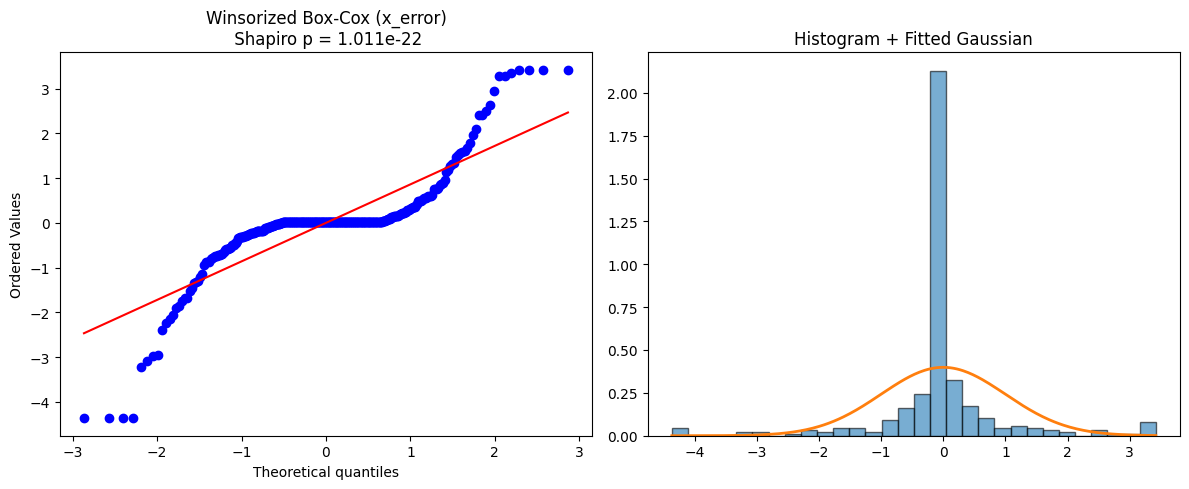


--- Experiment 3: Rank Gaussianization ---

Shapiro p (rank-gauss): 0.9999999999900561


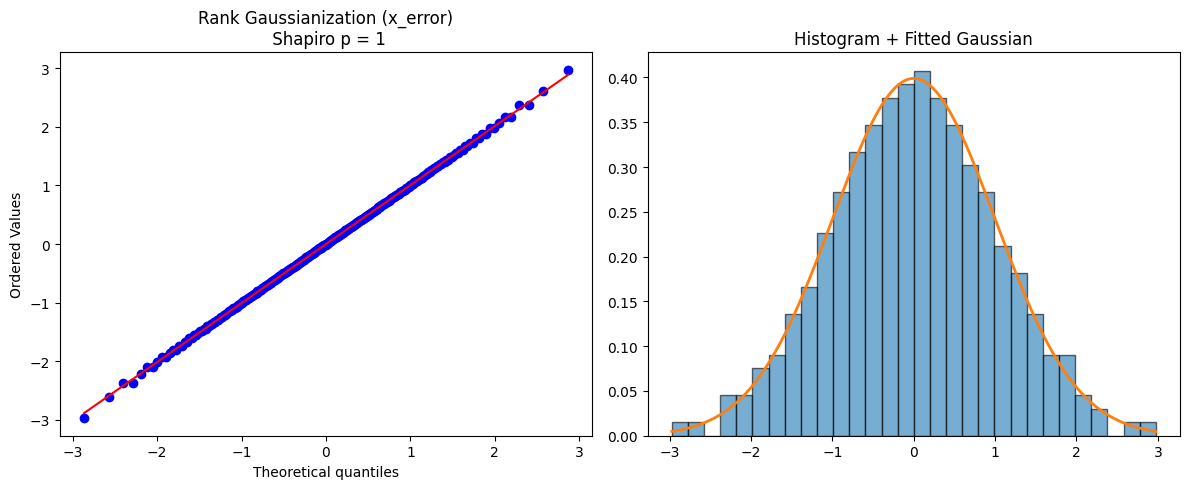


--- Experiment 4: Yeo-Johnson + Robust ---

Yeo-Johnson lambda: 4.674492763208403
Shapiro p: 3.6995315329391174e-09


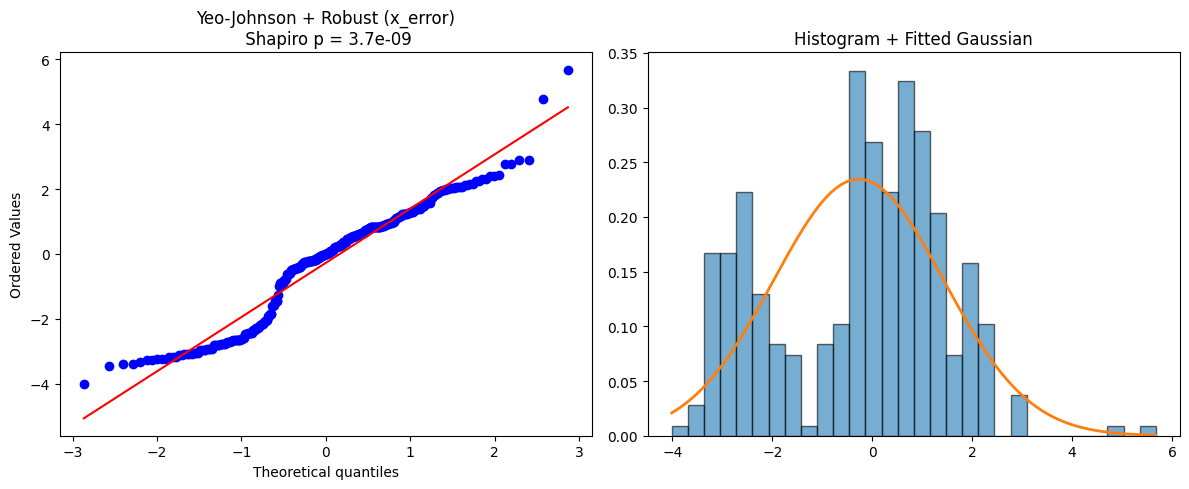


--- Final Summary ---

raw: p = 5.651e-20
1) Diff -> Box-Cox: p = 9.655e-24 (λ=1.050471765377128)
2) Winsorize -> Box-Cox: p = 1.011e-22 (λ=0.789028117738629)
3) Rank Gaussianization: p = 1
4) Yeo-Johnson + Robust: p = 3.7e-09 (λ=4.674493)


In [ ]:
df_meo["x_error_gauss"] = gaussianize_pipeline(df_meo["x_error"],"x_error")


 --- Step 1 Diagnose raw feature (y_error) ---

n = 334
unique value = 189

Top 10 repeated value:
y_error
 0.671544    2
 0.392191    2
 0.174319    2
-0.205229    2
-0.396329    2
-0.474095    2
-0.584909    2
 0.604875    2
 0.306909    2
 0.075185    2
Name: count, dtype: int64

Percentiles:
[-0.99785057 -0.79032057 -0.62367845  0.03828061  0.69342515  0.93373276
  0.94355888]

n_diff: 333
unique: 189
percentiles: [-0.92390034 -0.83596798 -0.72896771  0.          0.54281398  1.01928121
  1.8503587 ]

Shapiro p (raw): 1.1345690409932788e-15


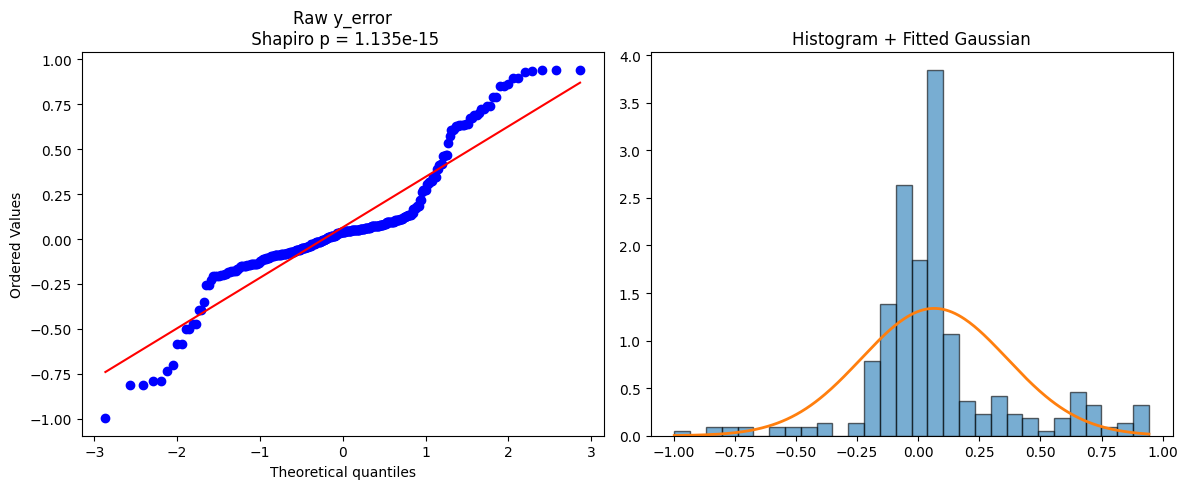


--- Experiment 1: Diff -> Box-Cox ---

Box-Cox lambda: 0.8031454432949595
Shapiro p: 5.378885707211137e-25


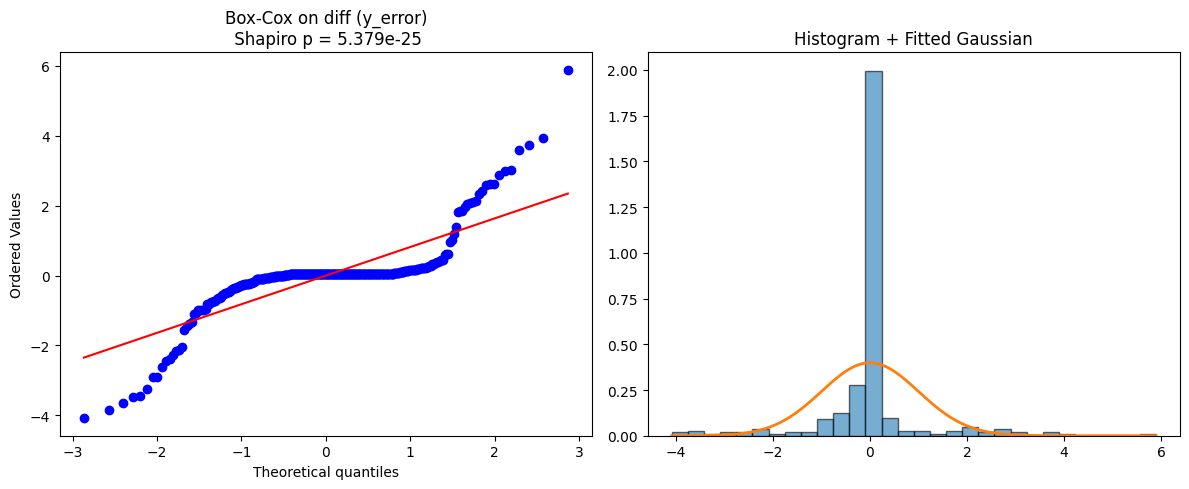


--- Experiment 2: Winsorize -> Box-Cox ---

Winsor Box-Cox lambda: 0.772768271604355
Shapiro p: 9.414577116404223e-25


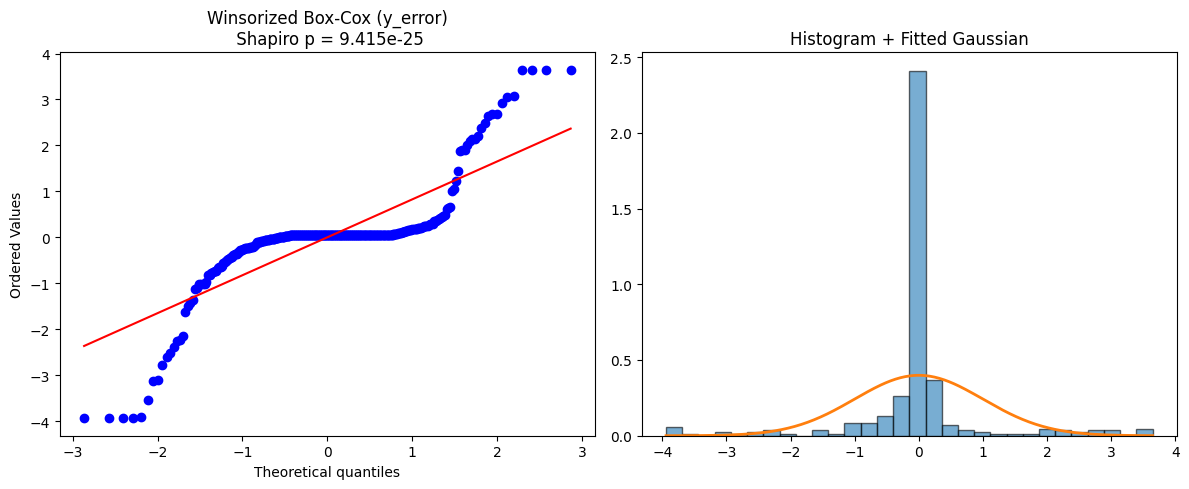


--- Experiment 3: Rank Gaussianization ---

Shapiro p (rank-gauss): 0.999999999100158


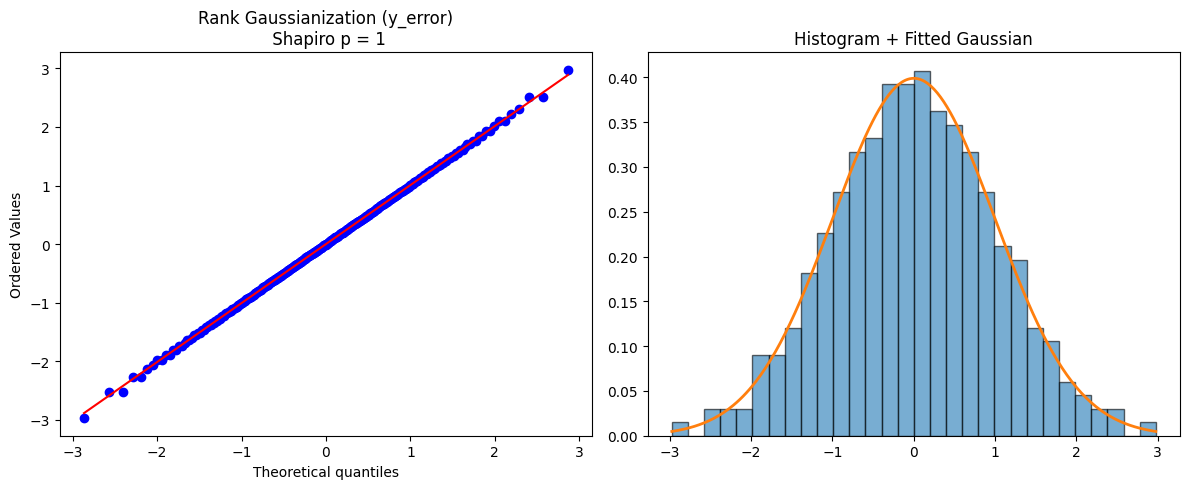


--- Experiment 4: Yeo-Johnson + Robust ---

Yeo-Johnson lambda: 0.5523515577192446
Shapiro p: 3.0130018002725806e-15


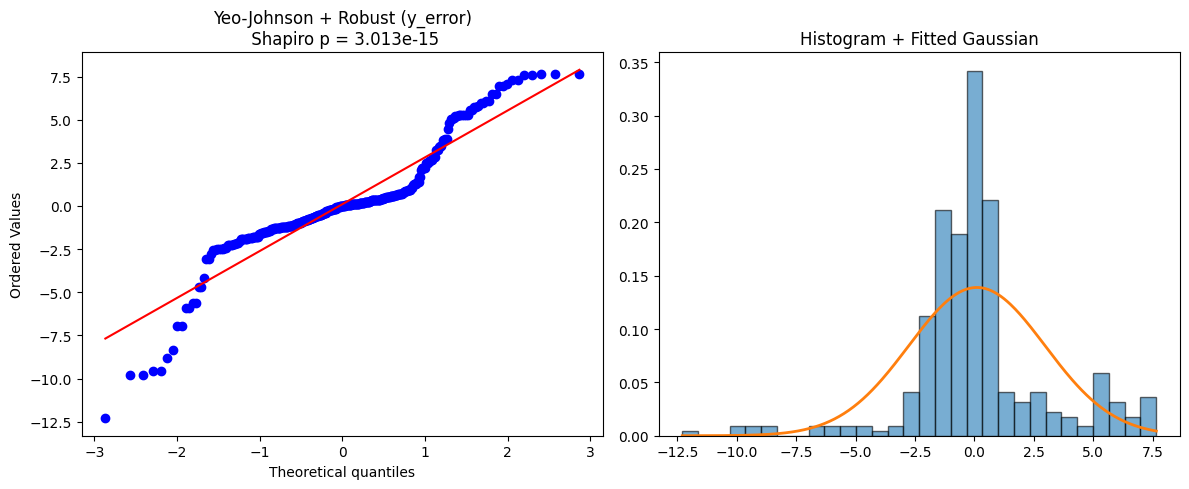


--- Final Summary ---

raw: p = 1.135e-15
1) Diff -> Box-Cox: p = 5.379e-25 (λ=0.8031454432949595)
2) Winsorize -> Box-Cox: p = 9.415e-25 (λ=0.772768271604355)
3) Rank Gaussianization: p = 1
4) Yeo-Johnson + Robust: p = 3.013e-15 (λ=0.552352)


In [ ]:
df_meo["y_error_gauss"] = gaussianize_pipeline(df_meo["y_error"],"y_error")


 --- Step 1 Diagnose raw feature (z_error) ---

n = 334
unique value = 189

Top 10 repeated value:
z_error
 0.434251    2
 0.637844    2
 0.723323    2
 0.718195    2
 0.475825    2
 0.207774    2
-0.216711    2
 0.674363    2
 0.719624    2
 0.676095    2
Name: count, dtype: int64

Percentiles:
[-0.867343   -0.85822497 -0.83602912  0.02077974  0.718195    0.78197666
  0.92689308]

n_diff: 333
unique: 189
percentiles: [-1.29834832 -0.80299271 -0.64382472  0.          0.5113223   0.86314108
  1.66007805]

Shapiro p (raw): 1.2818904964631577e-10


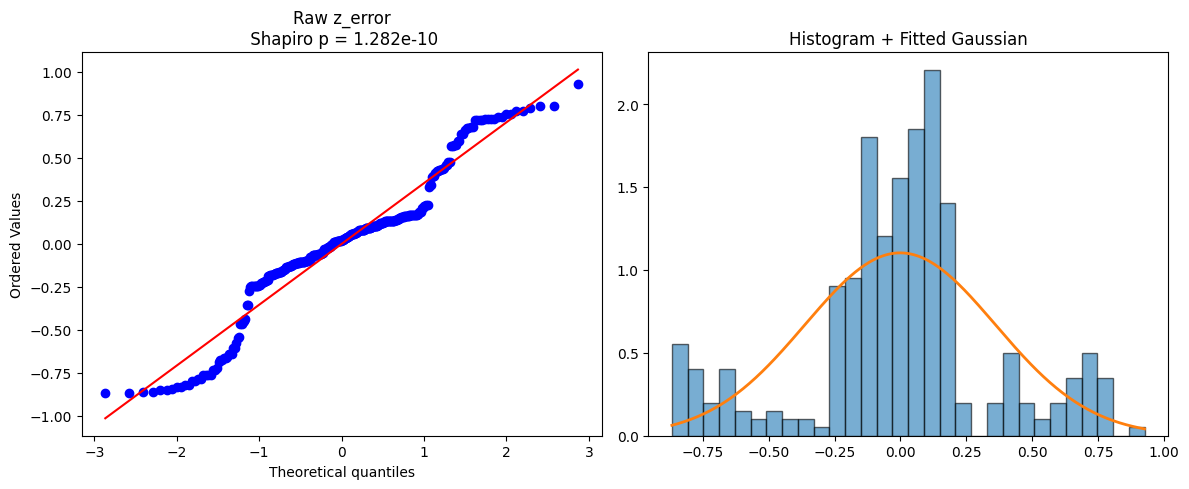


--- Experiment 1: Diff -> Box-Cox ---

Box-Cox lambda: 0.8851532617885806
Shapiro p: 4.587271274861274e-23


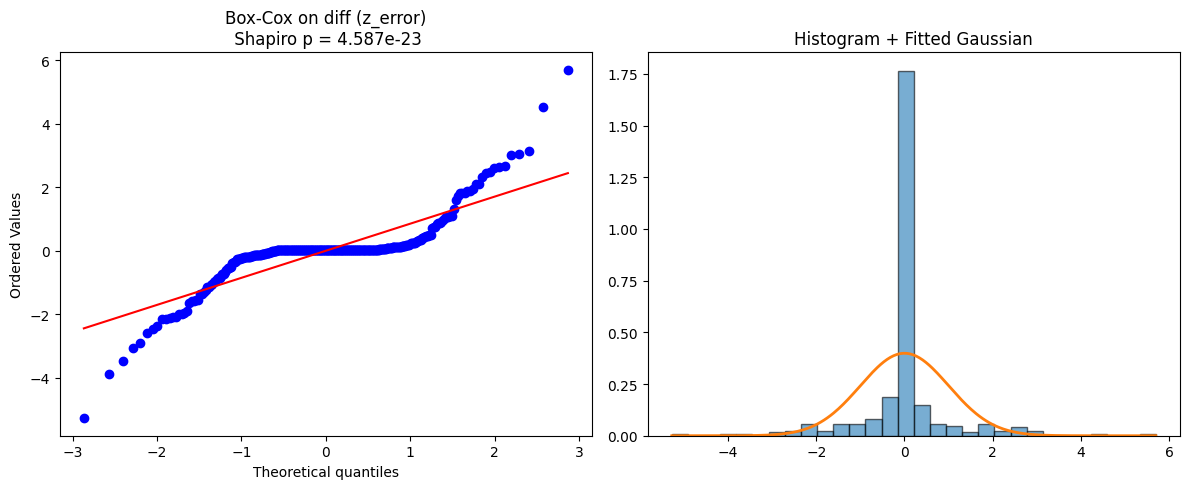


--- Experiment 2: Winsorize -> Box-Cox ---

Winsor Box-Cox lambda: 0.7954139038642095
Shapiro p: 2.770155319224805e-22


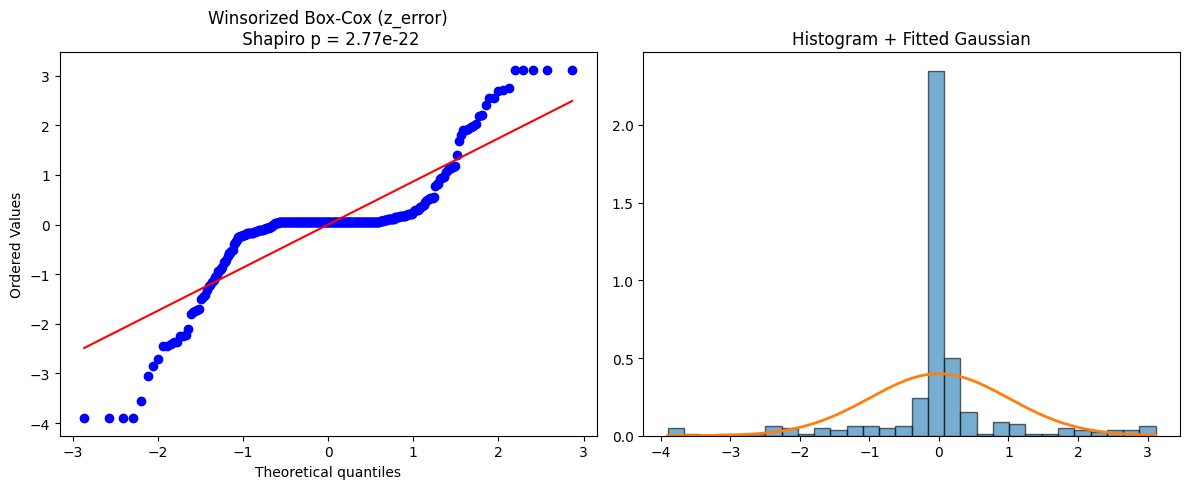


--- Experiment 3: Rank Gaussianization ---

Shapiro p (rank-gauss): 0.9999915551988842


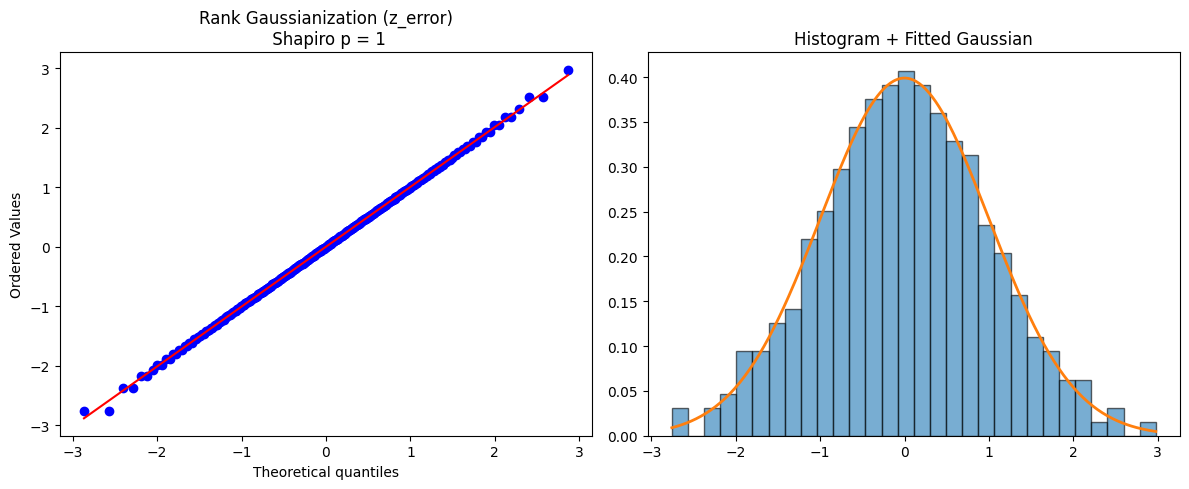


--- Experiment 4: Yeo-Johnson + Robust ---

Yeo-Johnson lambda: 1.2037515688281322
Shapiro p: 2.3657932461894267e-10


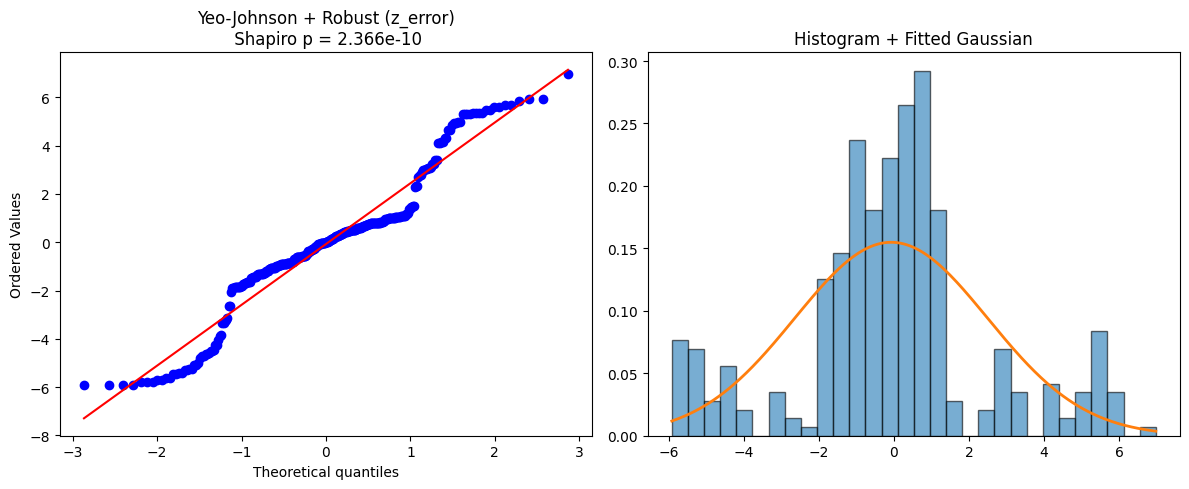


--- Final Summary ---

raw: p = 1.282e-10
1) Diff -> Box-Cox: p = 4.587e-23 (λ=0.8851532617885806)
2) Winsorize -> Box-Cox: p = 2.77e-22 (λ=0.7954139038642095)
3) Rank Gaussianization: p = 1
4) Yeo-Johnson + Robust: p = 2.366e-10 (λ=1.203752)


In [ ]:
df_meo["z_error_gauss"] = gaussianize_pipeline(df_meo["z_error"],"z_error")


 --- Step 1 Diagnose raw feature (satclockerror) ---

n = 334
unique value = 116

Top 10 repeated value:
satclockerror
-0.006356    31
-0.008911    25
 0.008539    16
 0.011094    15
-0.011465    12
-0.026361     9
 0.025990     7
 0.028544     6
-0.008911     6
-0.026361     6
Name: count, dtype: int64

Percentiles:
[-0.7307526  -0.5919125  -0.3142146  -0.00635647  0.1875048   0.68451421
  1.57600727]

n_diff: 333
unique: 145
percentiles: [-1.61872089 -0.60710247 -0.28169773  0.          0.15928725  0.76460398
  1.49753807]

Shapiro p (raw): 1.479124441384394e-28


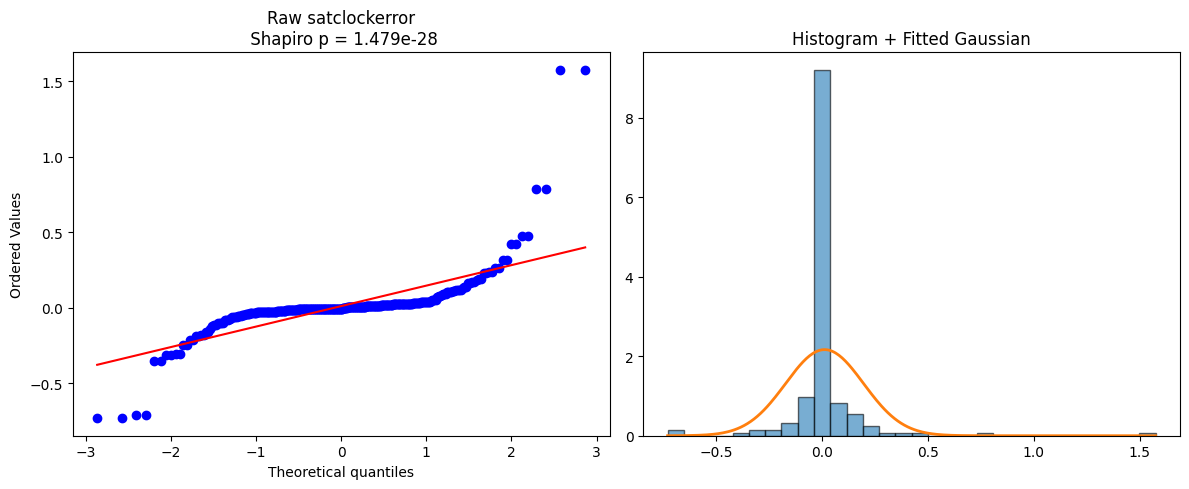


--- Experiment 1: Diff -> Box-Cox ---

Box-Cox lambda: 1.1708497512964475
Shapiro p: 2.989402341112769e-30


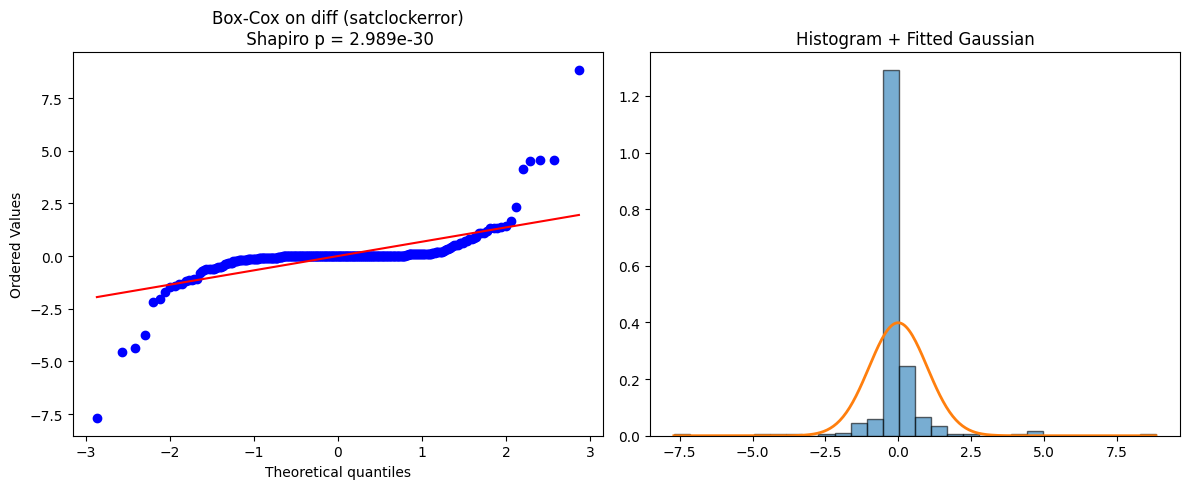


--- Experiment 2: Winsorize -> Box-Cox ---

Winsor Box-Cox lambda: 0.8941290501626746
Shapiro p: 1.5515587387394467e-28


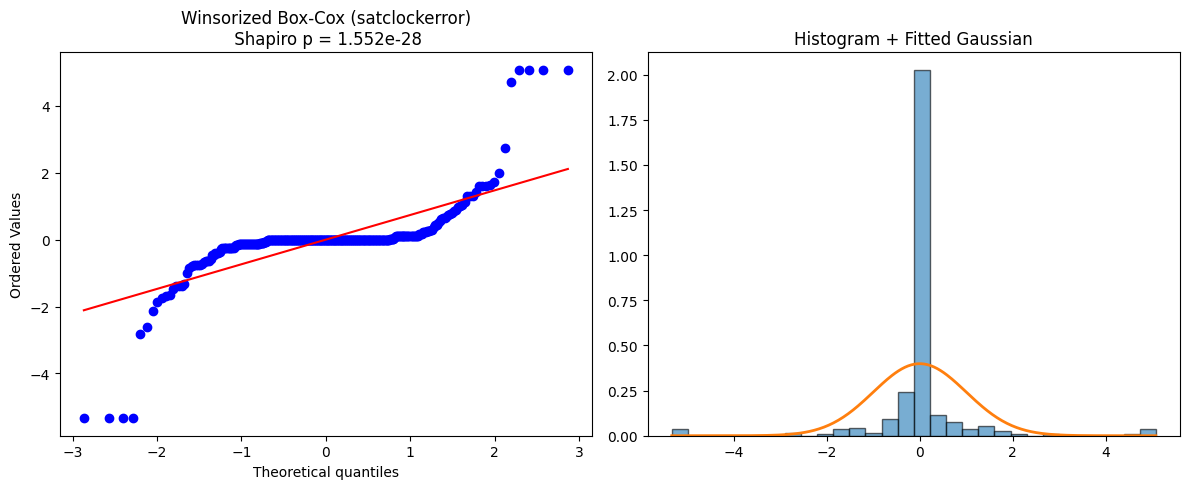


--- Experiment 3: Rank Gaussianization ---

Shapiro p (rank-gauss): 0.9702309643292235


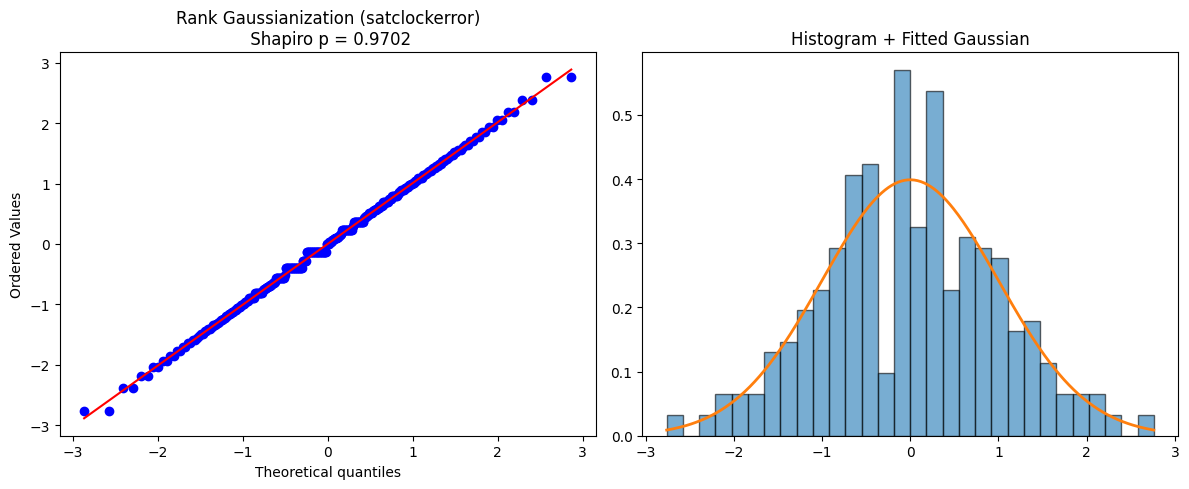


--- Experiment 4: Yeo-Johnson + Robust ---

Yeo-Johnson lambda: 0.1251515222774751
Shapiro p: 5.7767093860622776e-27


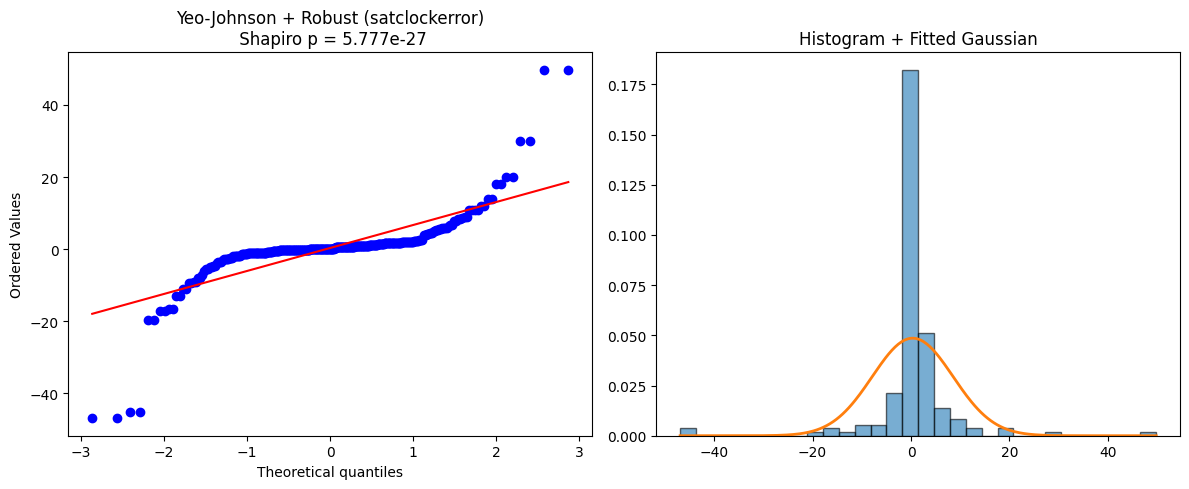


--- Final Summary ---

raw: p = 1.479e-28
1) Diff -> Box-Cox: p = 2.989e-30 (λ=1.1708497512964475)
2) Winsorize -> Box-Cox: p = 1.552e-28 (λ=0.8941290501626746)
3) Rank Gaussianization: p = 0.9702
4) Yeo-Johnson + Robust: p = 5.777e-27 (λ=0.125152)


In [ ]:
df_meo["satclockerror_gauss"] = gaussianize_pipeline(df_meo["satclockerror"],"satclockerror")

In [ ]:
df_meo.to_csv("/content/Gaussianized_MEO_Data.csv",index=False)

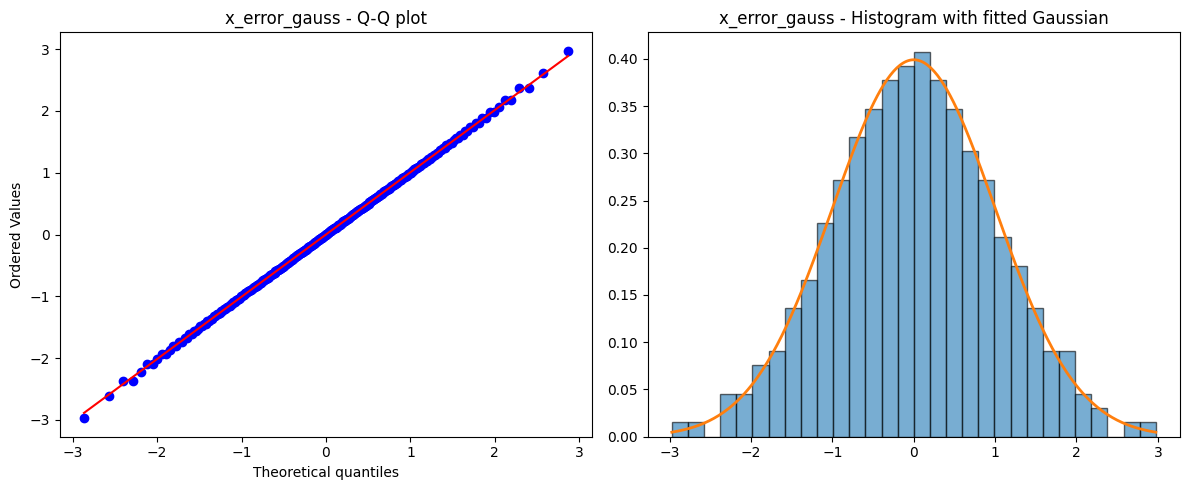

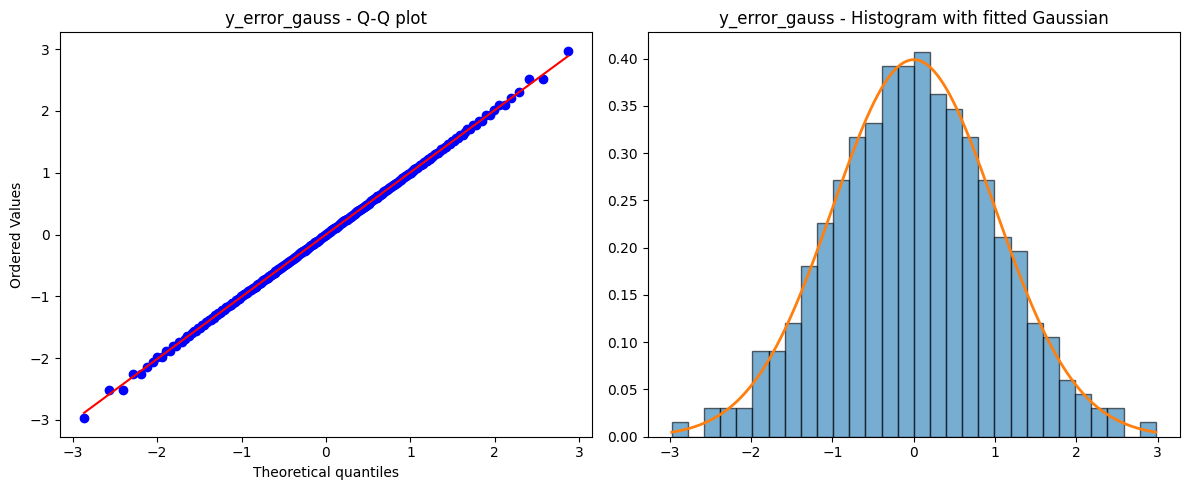

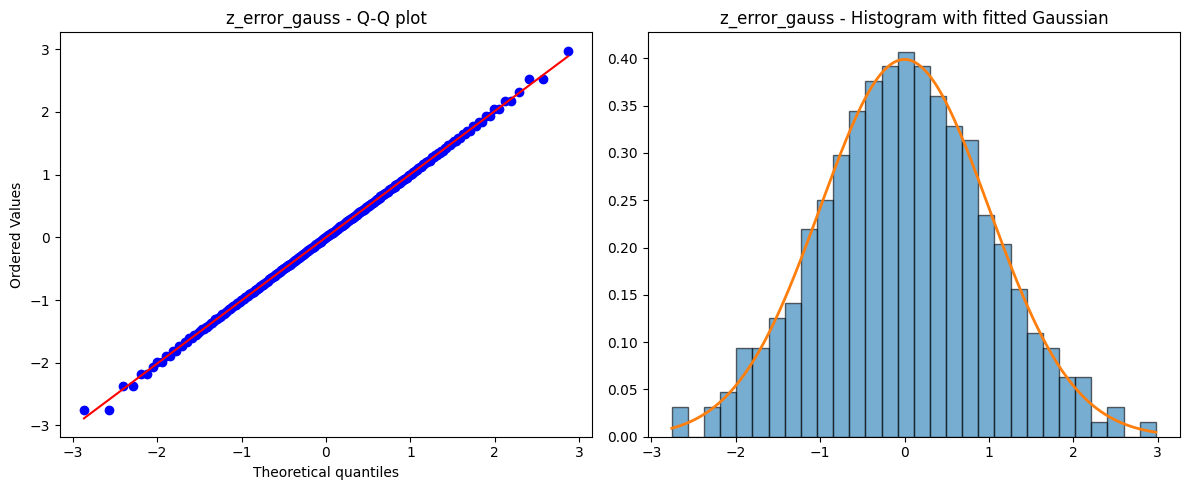

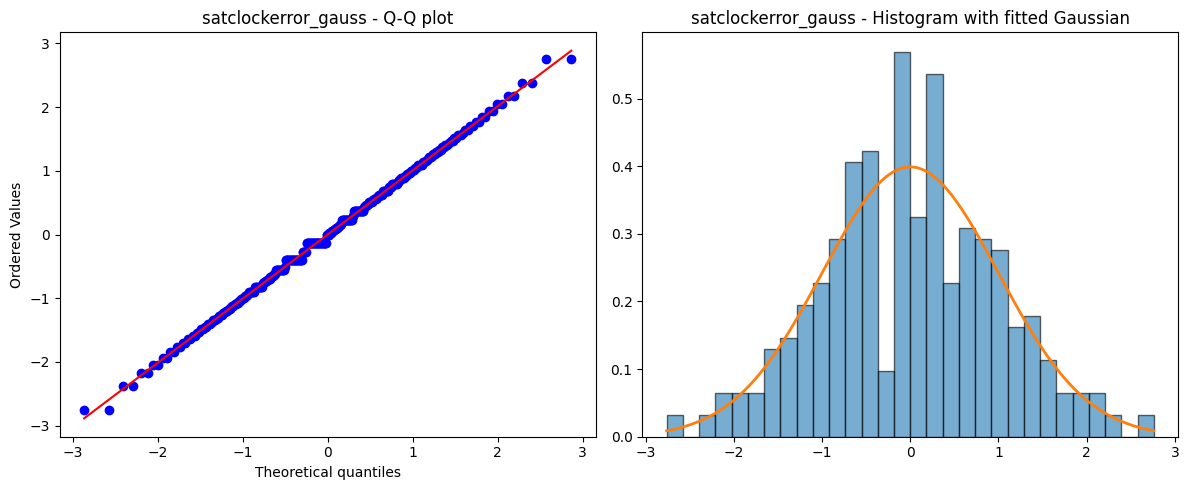

Outliers counts (|z| > 3) for Gaussianized features: 
x_error_gauss: 0 outliers
y_error_gauss: 0 outliers
z_error_gauss: 0 outliers
satclockerror_gauss: 0 outliers


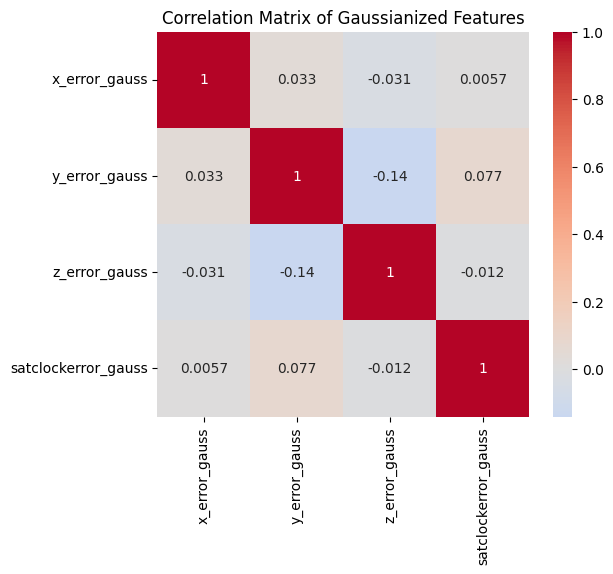

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import numpy as np

df_meo = pd.read_csv("/content/Gaussianized_MEO_Data.csv")
gauss_features = ["x_error_gauss", "y_error_gauss", "z_error_gauss", "satclockerror_gauss"]

for feat in gauss_features:
  data = df_meo[feat].to_numpy(dtype=float)
  data = data[np.isfinite(data)]          # removes NaN and inf

  if data.size == 0:
    print(f"[skip] {feat}: no finite values")
    continue

  fig, ax = plt.subplots(1,2,figsize=(12,5))

  st.probplot(data, dist="norm", plot=ax[0]) # compares empirical quantiles with theoretical normal quantiles
  ax[0].set_title(f"{feat} - Q-Q plot")

  ax[1].hist(data, bins=30, density=True, alpha=0.6, edgecolor="black")

  mu, sigma = data.mean(), data.std(ddof=0)
  if sigma < 1e-12: # prevent division-by-zero in case of near-constant data
    sigma = 1.0

  x_vals = np.linspace(data.min(), data.max(), 300) # generate x-values and overlay fitted Gaussian PDF
  ax[1].plot(x_vals, st.norm.pdf(x_vals, mu, sigma), lw=2)
  ax[1].set_title(f"{feat} - Histogram with fitted Gaussian")

  plt.tight_layout()
  plt.show()

print("Outliers counts (|z| > 3) for Gaussianized features: ")
for feat in gauss_features:
  data = df_meo[feat].to_numpy(dtype=float)
  data = data[np.isfinite(data)]
  if data.size == 0:
    print(f"{feat}: (skip, empty)")
    continue
  outliers = np.sum(np.abs(data) > 3)
  print(f"{feat}: {outliers} outliers")


plt.figure(figsize=(6,5))
sns.heatmap(df_meo[gauss_features].corr(),annot=True,cmap="coolwarm",center=0)
plt.title("Correlation Matrix of Gaussianized Features")
plt.show()

In [ ]:
import numpy as np
import pandas as pd

df_meo['utc_time'] = pd.to_datetime(df_meo['utc_time'], errors='coerce', utc=False)

df_meo['dt'] = pd.to_numeric(df_meo['dt'], errors='coerce')
df_meo['satclockerror'] = pd.to_numeric(df_meo['satclockerror'], errors='coerce')

df_meo = df_meo.sort_values('utc_time').reset_index(drop=True)

eps = 1e-9

df_meo['phi'] = np.arctan2(df_meo['y_error'], df_meo['x_error'])
df_meo['theta'] = np.arctan2(
    df_meo['z_error'],
    np.sqrt(df_meo['x_error']**2 + df_meo['y_error']**2) + eps
)

df_meo['sin_phi'] = np.sin(df_meo['phi'])
df_meo['cos_phi'] = np.cos(df_meo['phi'])
df_meo['sin_theta'] = np.sin(df_meo['theta'])
df_meo['cos_theta'] = np.cos(df_meo['theta'])

df_meo['clock_drift'] = df_meo['satclockerror'].diff() / df_meo['dt']

W = int((12 * 3600) / df_meo['dt'].median())

df_meo['allan_like_clock_variance'] = (
    0.5 * (df_meo['satclockerror'].diff() ** 2)
    .rolling(W, min_periods=W // 2)
    .mean()
)

SIDEREAL_DAY = 86164.0

t0 = df_meo['utc_time'].iloc[0]
t_sec = (df_meo['utc_time'] - t0).dt.total_seconds()

df_meo['sin_sidereal'] = np.sin(2 * np.pi * t_sec / SIDEREAL_DAY)
df_meo['cos_sidereal'] = np.cos(2 * np.pi * t_sec / SIDEREAL_DAY)

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg

df_meo['utc_time'] = pd.to_datetime(df_meo['utc_time'])
df_meo = df_meo.sort_values('utc_time').reset_index(drop=True)

df_meo['date'] = df_meo['utc_time'].dt.date
unique_dates = sorted(df_meo['date'].unique())
date_to_day = {d: i+1 for i, d in enumerate(unique_dates)}
df_meo['day'] = df_meo['date'].map(date_to_day).astype(int)

df_meo = df_meo.drop_duplicates(subset=['utc_time'], keep='first').reset_index(drop=True)

df_meo['dt_sec'] = df_meo['utc_time'].diff().dt.total_seconds()
df_meo.loc[df_meo.index[0], 'dt_sec'] = np.nan

train_days = list(range(1, 7))
test_days  = [7]

train_mask = df_meo['day'].isin(train_days)
test_mask  = df_meo['day'].isin(test_days)

train_df = df_meo.loc[train_mask].copy()
test_df  = df_meo.loc[test_mask].copy()

y_train = train_df['residual'].astype(float).dropna()

ar1 = AutoReg(y_train, lags=1, trend='c', old_names=False).fit()

const = float(ar1.params.get('const', 0.0))
phi   = float(ar1.params.iloc[1])

y_full = df_meo['residual'].astype(float)
y_lag1 = y_full.shift(1)
df_meo['residual_innov'] = y_full - (const + phi * y_lag1)
df_meo.loc[y_lag1.isna(), 'residual_innov'] = np.nan

def kalman_local_level_dt(y, dt_sec, train_mask, q_scale=0.01, r_scale=0.1):
    y = np.asarray(y, dtype=float)
    dt_sec = np.asarray(dt_sec, dtype=float)
    tm = np.asarray(train_mask, dtype=bool)

    y_train = y[tm]
    y_train = y_train[~np.isnan(y_train)]
    if len(y_train) < 5:
        raise ValueError("Not enough train points to estimate KF variances.")

    base_var = np.nanvar(y_train)
    r = max(base_var * r_scale, 1e-12)
    q = max(base_var * q_scale, 1e-12)

    n = len(y)
    x_filt = np.full(n, np.nan)
    P_filt = np.full(n, np.nan)
    innov  = np.full(n, np.nan)

    idx0 = np.where(~np.isnan(y))[0]
    if len(idx0) == 0:
        return x_filt, innov
    k0 = idx0[0]
    x = y[k0]
    P = r

    x_filt[k0] = x
    P_filt[k0] = P
    innov[k0]  = np.nan

    for k in range(k0 + 1, n):
        if np.isnan(y[k]):
            continue

        dtk = dt_sec[k]
        if np.isnan(dtk) or dtk <= 0:
            dtk = 1.0

        x_pred = x
        P_pred = P + q * dtk

        innov[k] = y[k] - x_pred

        S = P_pred + r
        K = P_pred / S
        x = x_pred + K * innov[k]
        P = (1 - K) * P_pred

        x_filt[k] = x
        P_filt[k] = P

    return x_filt, innov

df_meo['residual_kf_state'], df_meo['residual_kf_innov'] = kalman_local_level_dt(
    y=df_meo['residual'].astype(float).values,
    dt_sec=df_meo['dt_sec'].values,
    train_mask=train_mask.values,
    q_scale=0.01,
    r_scale=0.1
)

if 'satclockerror' in df_meo.columns:
    df_meo['clock_kf_state'], df_meo['clock_kf_innov'] = kalman_local_level_dt(
        y=df_meo['satclockerror'].astype(float).values,
        dt_sec=df_meo['dt_sec'].values,
        train_mask=train_mask.values,
        q_scale=0.01,
        r_scale=0.1
    )

train_df = df_meo.loc[train_mask].copy()
test_df  = df_meo.loc[test_mask].copy()

print("Train days:", train_df['day'].unique(), "rows:", len(train_df))
print("Test days :", test_df['day'].unique(),  "rows:", len(test_df))
print("NaNs AR innov:", df_meo['residual_innov'].isna().sum())
print("NaNs KF innov:", df_meo['residual_kf_innov'].isna().sum())
print(df_meo[['utc_time','residual','residual_innov','residual_kf_innov']].head(8))

Train days: [1 2 3 4 5 6] rows: 105
Test days : [7] rows: 44
NaNs AR innov: 1
NaNs KF innov: 1
             utc_time  residual  residual_innov  residual_kf_innov
0 2025-09-01 14:00:00  1.107304             NaN                NaN
1 2025-09-01 15:00:00  0.939943        0.161138          -0.167361
2 2025-09-01 16:00:00  0.916914        0.204415          -0.023492
3 2025-09-01 17:00:00  0.984409        0.281034           0.067430
4 2025-09-01 18:00:00  0.889755        0.159640          -0.094467
5 2025-09-01 19:00:00  0.931436        0.238822           0.041420
6 2025-09-01 20:00:00  1.044346        0.335218           0.113024
7 2025-09-02 17:00:00  0.965973        0.212111          -0.078061


In [ ]:
print(df_meo.groupby('day')['utc_time'].agg(['min','max','count']))
print("AR train start:", train_df['utc_time'].min())
print("AR train end  :", train_df['utc_time'].max())
print("Test start    :", test_df['utc_time'].min())
print("NaNs in residual_innov:", df_meo['residual_innov'].isna().sum())
print("First 5 residual_innov:\n", df_meo[['utc_time','residual','residual_innov']].head())

                    min                 max  count
day                                               
1   2025-09-01 14:00:00 2025-09-01 20:00:00      7
2   2025-09-02 17:00:00 2025-09-02 23:00:00      7
3   2025-09-03 10:11:00 2025-09-03 23:00:00     26
4   2025-09-04 00:00:00 2025-09-04 23:51:00     21
5   2025-09-05 00:00:00 2025-09-05 23:51:00      8
6   2025-09-06 00:59:00 2025-09-06 14:13:00     36
7   2025-09-07 06:00:00 2025-09-07 21:51:00     44
8   2025-09-08 22:27:00 2025-09-08 23:11:00      6
9   2025-09-09 00:19:00 2025-09-09 11:41:00     34
AR train start: 2025-09-01 14:00:00
AR train end  : 2025-09-06 14:13:00
Test start    : 2025-09-07 06:00:00
NaNs in residual_innov: 1
First 5 residual_innov:
              utc_time  residual  residual_innov
0 2025-09-01 14:00:00  1.107304             NaN
1 2025-09-01 15:00:00  0.939943        0.161138
2 2025-09-01 16:00:00  0.916914        0.204415
3 2025-09-01 17:00:00  0.984409        0.281034
4 2025-09-01 18:00:00  0.889755        0

In [ ]:
cols_to_drop = [
    "clock_ar_innov",
    "clock_kf_state",
    "residual_innov",
    "residual_kf_state",
]

df_meo = df_meo.drop(columns=cols_to_drop, errors="ignore")

In [ ]:
df_meo.to_csv("df_meo_feature_engineered.csv", index=False)

In [ ]:
FEATURE_COLS = [
    'residual',
    'residual_kf_innov',

    'satclockerror',
    'clock_kf_innov',

    'sin_phi', 'cos_phi',
    'sin_theta', 'cos_theta',

    'sin_sidereal', 'cos_sidereal'
]
TARGET_COL = 'residual_kf_innov'

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

scaler_X.fit(train_df[FEATURE_COLS])
scaler_y.fit(train_df[[TARGET_COL]])

df_meo_scaled = df_meo.copy()
df_meo_scaled[FEATURE_COLS] = scaler_X.transform(df_meo[FEATURE_COLS])
df_meo_scaled[TARGET_COL] = scaler_y.transform(df_meo[[TARGET_COL]])

In [ ]:
import numpy as np

def build_sequences(
    df,
    feature_cols,
    target_col,
    lookback,
    day_col='day'
):
    """
    Builds (X, y) sequences with:
    - no day-boundary crossing
    - strict causal ordering
    """

    X, y = [], []

    values_X = df[feature_cols].values
    values_y = df[target_col].values
    days = df[day_col].values

    for i in range(lookback, len(df)):
        # enforce same-day constraint
        if len(set(days[i-lookback:i+1])) != 1:
            continue

        x_seq = values_X[i-lookback:i]
        y_tgt = values_y[i]

        if np.any(np.isnan(x_seq)) or np.isnan(y_tgt):
            continue

        X.append(x_seq)
        y.append(y_tgt)

    return np.array(X), np.array(y)

In [ ]:
LOOKBACK = 12   # sweet spot for your sampling density

In [ ]:
X_train, y_train = build_sequences(
    df=df_meo_scaled.loc[train_mask],
    feature_cols=FEATURE_COLS,
    target_col=TARGET_COL,
    lookback=LOOKBACK
)

X_test, y_test = build_sequences(
    df=df_meo_scaled.loc[test_mask],
    feature_cols=FEATURE_COLS,
    target_col=TARGET_COL,
    lookback=LOOKBACK
)

print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test :", X_test.shape,  "y_test :", y_test.shape)

X_train: (47, 12, 10) y_train: (47,)
X_test : (32, 12, 10) y_test : (32,)


In [ ]:

print("Last train utc:", train_df['utc_time'].max())
print("First test seq utc:",test_df.iloc[LOOKBACK]['utc_time'])
idx = 0
print(df_meo.loc[train_mask].iloc[idx:idx+LOOKBACK+1][['utc_time', TARGET_COL]])

Last train utc: 2025-09-06 14:13:00
First test seq utc: 2025-09-07 14:21:00
              utc_time  residual_kf_innov
0  2025-09-01 14:00:00                NaN
1  2025-09-01 15:00:00          -0.167361
2  2025-09-01 16:00:00          -0.023492
3  2025-09-01 17:00:00           0.067430
4  2025-09-01 18:00:00          -0.094467
5  2025-09-01 19:00:00           0.041420
6  2025-09-01 20:00:00           0.113024
7  2025-09-02 17:00:00          -0.078061
8  2025-09-02 18:00:00          -0.081541
9  2025-09-02 19:00:00           0.092893
10 2025-09-02 20:00:00          -0.089115
11 2025-09-02 21:00:00           0.016619
12 2025-09-02 22:00:00           0.230150


In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
class SequenceDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
class Chomp1d(nn.Module):
    def __init__(self, chomp_size):
        super().__init__()
        self.chomp_size = chomp_size

    def forward(self, x):
        return x[:, :, :-self.chomp_size]
class TemporalBlock(nn.Module):
    def __init__(
        self,
        in_channels,
        out_channels,
        kernel_size,
        dilation,
        dropout
    ):
        super().__init__()

        padding = (kernel_size - 1) * dilation

        self.conv1 = nn.Conv1d(
            in_channels,
            out_channels,
            kernel_size,
            padding=padding,
            dilation=dilation
        )
        self.chomp1 = Chomp1d(padding)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout)

        self.conv2 = nn.Conv1d(
            out_channels,
            out_channels,
            kernel_size,
            padding=padding,
            dilation=dilation
        )
        self.chomp2 = Chomp1d(padding)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout)

        self.net = nn.Sequential(
            self.conv1, self.chomp1, self.relu1, self.dropout1,
            self.conv2, self.chomp2, self.relu2, self.dropout2
        )

        self.downsample = (
            nn.Conv1d(in_channels, out_channels, 1)
            if in_channels != out_channels else None
        )

        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.net(x)
        res = x if self.downsample is None else self.downsample(x)
        return self.relu(out + res)
class TCN(nn.Module):
    def __init__(
        self,
        num_inputs,
        num_channels,
        kernel_size=3,
        dropout=0.1
    ):
        super().__init__()

        layers = []
        num_levels = len(num_channels)

        for i in range(num_levels):
            dilation = 2 ** i
            in_ch = num_inputs if i == 0 else num_channels[i-1]
            out_ch = num_channels[i]

            layers.append(
                TemporalBlock(
                    in_channels=in_ch,
                    out_channels=out_ch,
                    kernel_size=kernel_size,
                    dilation=dilation,
                    dropout=dropout
                )
            )

        self.network = nn.Sequential(*layers)
        self.fc = nn.Linear(num_channels[-1], 1)

    def forward(self, x):
        x = x.transpose(1, 2)
        y = self.network(x)
        y = y[:, :, -1]
        return self.fc(y).squeeze(-1)
BATCH_SIZE = 8

train_ds = SequenceDataset(X_train, y_train)
test_ds  = SequenceDataset(X_test, y_test)

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
test_loader  = DataLoader(test_ds, batch_size=BATCH_SIZE, shuffle=False)
model = TCN(
    num_inputs=10,
    num_channels=[16, 16, 16],
    kernel_size=3,
    dropout=0.1
).to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
EPOCHS = 200
PATIENCE = 15

best_val = np.inf
patience_ctr = 0

for epoch in range(EPOCHS):
    model.train()
    train_loss = 0.0

    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)

        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(train_loader)

    model.eval()
    val_loss = 0.0

    with torch.no_grad():
        for xb, yb in test_loader:
            xb, yb = xb.to(device), yb.to(device)
            preds = model(xb)
            loss = criterion(preds, yb)
            val_loss += loss.item()

    val_loss /= len(test_loader)

    print(
        f"Epoch {epoch:03d} | "
        f"Train MSE: {train_loss:.5f} | "
        f"Val MSE: {val_loss:.5f}"
    )

    if val_loss < best_val:
        best_val = val_loss
        patience_ctr = 0
        best_state = model.state_dict()
    else:
        patience_ctr += 1
        if patience_ctr >= PATIENCE:
            print("Early stopping triggered.")
            break

model.load_state_dict(best_state)
model.eval()
y_pred = []

with torch.no_grad():
    for xb, _ in test_loader:
        xb = xb.to(device)
        preds = model(xb)
        y_pred.append(preds.cpu().numpy())

y_pred = np.concatenate(y_pred)
y_pred_inv = scaler_y.inverse_transform(y_pred.reshape(-1,1)).ravel()
y_test_inv = scaler_y.inverse_transform(y_test.reshape(-1,1)).ravel()
rmse = np.sqrt(np.mean((y_pred_inv - y_test_inv)**2))
mae  = np.mean(np.abs(y_pred_inv - y_test_inv))

print("Innovation RMSE:", rmse)
print("Innovation MAE :", mae)

Using device: cuda
Epoch 000 | Train MSE: 1.33887 | Val MSE: 0.77731
Epoch 001 | Train MSE: 1.21794 | Val MSE: 0.73737
Epoch 002 | Train MSE: 1.17190 | Val MSE: 0.71375
Epoch 003 | Train MSE: 1.06368 | Val MSE: 0.70500
Epoch 004 | Train MSE: 1.04825 | Val MSE: 0.70088
Epoch 005 | Train MSE: 1.02326 | Val MSE: 0.70340
Epoch 006 | Train MSE: 0.98198 | Val MSE: 0.71150
Epoch 007 | Train MSE: 0.89108 | Val MSE: 0.71152
Epoch 008 | Train MSE: 0.86441 | Val MSE: 0.70204
Epoch 009 | Train MSE: 0.84301 | Val MSE: 0.68255
Epoch 010 | Train MSE: 0.77268 | Val MSE: 0.65590
Epoch 011 | Train MSE: 0.70441 | Val MSE: 0.63437
Epoch 012 | Train MSE: 0.70272 | Val MSE: 0.61968
Epoch 013 | Train MSE: 0.63025 | Val MSE: 0.63633
Epoch 014 | Train MSE: 0.56731 | Val MSE: 0.63333
Epoch 015 | Train MSE: 0.47141 | Val MSE: 0.61898
Epoch 016 | Train MSE: 0.51864 | Val MSE: 0.57808
Epoch 017 | Train MSE: 0.43019 | Val MSE: 0.58228
Epoch 018 | Train MSE: 0.37897 | Val MSE: 0.56715
Epoch 019 | Train MSE: 0.41882 

In [ ]:
def get_target_indices(df, lookback, day_col='day'):
    idxs = []
    days = df[day_col].values
    for i in range(lookback, len(df)):
        if len(set(days[i-lookback:i+1])) != 1:
            continue
        idxs.append(i)
    return np.array(idxs, dtype=int)

LOOKBACK = 12
test_df_scaled = df_meo_scaled.loc[test_mask].copy().reset_index(drop=True)
test_target_idx = get_target_indices(test_df_scaled, LOOKBACK)

test_df_raw = df_meo.loc[test_mask].copy().reset_index(drop=True)
r_prev = test_df_raw.loc[test_target_idx - 1, 'residual'].values

r_hat = r_prev + y_pred_inv

r_true = test_df_raw.loc[test_target_idx, 'residual'].values

rmse_res = np.sqrt(np.mean((r_hat - r_true)**2))
mae_res  = np.mean(np.abs(r_hat - r_true))

print("Reconstructed residual RMSE:", rmse_res)
print("Reconstructed residual MAE :", mae_res)

Reconstructed residual RMSE: 0.35324832647883675
Reconstructed residual MAE : 0.2751294523138118
